### INX Future Inc Employee Performance - Project 

INX Future Inc, (referred as INX) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry. Recent years, the employee performance indexes are not healthy, and this is becoming a growing concern among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points. CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further reduce the performance. Also, the market perception best employer and thereby attracting best talents to join the company. Mr. Brain decided to initiate a data science project, which analyses the current employee data and find the core underlying causes of this performance issues. Mr. Brain, being a data scientist himself, expects the findings of this project will help him to take right course of actions. He also expects a clear indicator of nonperforming employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals. 

The following insights are expected from this project. 
1. Department wise performances 
2. Top 3 Important Factors effecting employee performance
 3. A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees. 
4. Recommendations to improve the employee performance based on insights from analysis.


Summary of project steps

1. Data Loading and Preprocessing
2. Exploratory Data Analysis
3. Data Preprocessing 
4. Model Building, traning and prediction
5. Results and Analysis 

Data Understanding
The data for training the model was collected from the company INX Future Inc. The data collected included 1200 employee’s performance appraisal records, described by 28 parameters. the parameters show the different attributes of an employee based on which the prediction is to be made.

Features present in the dataset
1. EmpNumber
2. Age
3. Gender
4. EducationBackground
5. MaritalStatus
6. EmpDepartment
7. EmpJobRole
8. BusinessTravelFrequency
9. DistanceFromHome
10. EmpEducationLevel
11. EmpEnvironmentSatisfaction
12. EmpHourlyRate
13. EmpJobInvolvement
14. EmpJobLevel
15. EmpJobSatisfaction
16. NumCompaniesWorked
17. OverTime
18. EmpLastSalaryHikePercent
19. EmpRelationshipSatisfaction
20. TotalWorkExperienceInYears
21. TrainingTimesLastYear
22. EmpWorkLifeBalance
23. ExperienceYearsAtThisCompany
24. ExperienceYearsInCurrentRole
25. YearsSinceLastPromotion
26. YearsWithCurrManager
27. Attrition
28. PerformanceRating

#### Importing libraries

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

import warnings 
warnings.filterwarnings('ignore')

## 1. Data Loading and Preprocessing

In [2]:
# importing the Excel data file and df

df = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

In [3]:
# Inspecting the first five rows 

df.head(5)

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [4]:
# Checking the number of rows and columns of the dataset

df.shape

(1200, 28)

In [5]:
# Returns an object with all of the column names

df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [6]:
# Returns basic information on all columns (columnName, Non-nullCount & Dtyyes)

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       


*The dataset has a total of 28 features and 1200 instances. Among these features, 19 are of the int64 data type, while the remaining 9 features are of the object data type.*

## 2. Exploratory Data Analysis

In [7]:
# Returns basic statistics on numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


In [8]:
# Returns a summary of statistics on categorical columns

df.describe(include="O").T

,count,unique,top,freq
EmpNumber,1200,1200,E1001000,1
Gender,1200,2,Male,725
EducationBackground,1200,6,Life Sciences,492
MaritalStatus,1200,3,Married,548
EmpDepartment,1200,6,Sales,373
EmpJobRole,1200,19,Sales Executive,270
BusinessTravelFrequency,1200,3,Travel_Rarely,846
OverTime,1200,2,No,847
Attrition,1200,2,No,1022


### Unviriate analysis, Biaviriate analysis and Multviriate analysis

**Discrete and Categorical**

histogram: A histogram is a bar graph-like representation of data that buckets a range of classes into columns along the horizontal x-axis. The vertical y-axis represents the number count or percentage of occurrences in the data for each column.
line plots: A-Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value.

**continuous features**

Countplot: counterplot is used to show the counts of observations in each categorical bin using bars.

### Unviriate Analysis

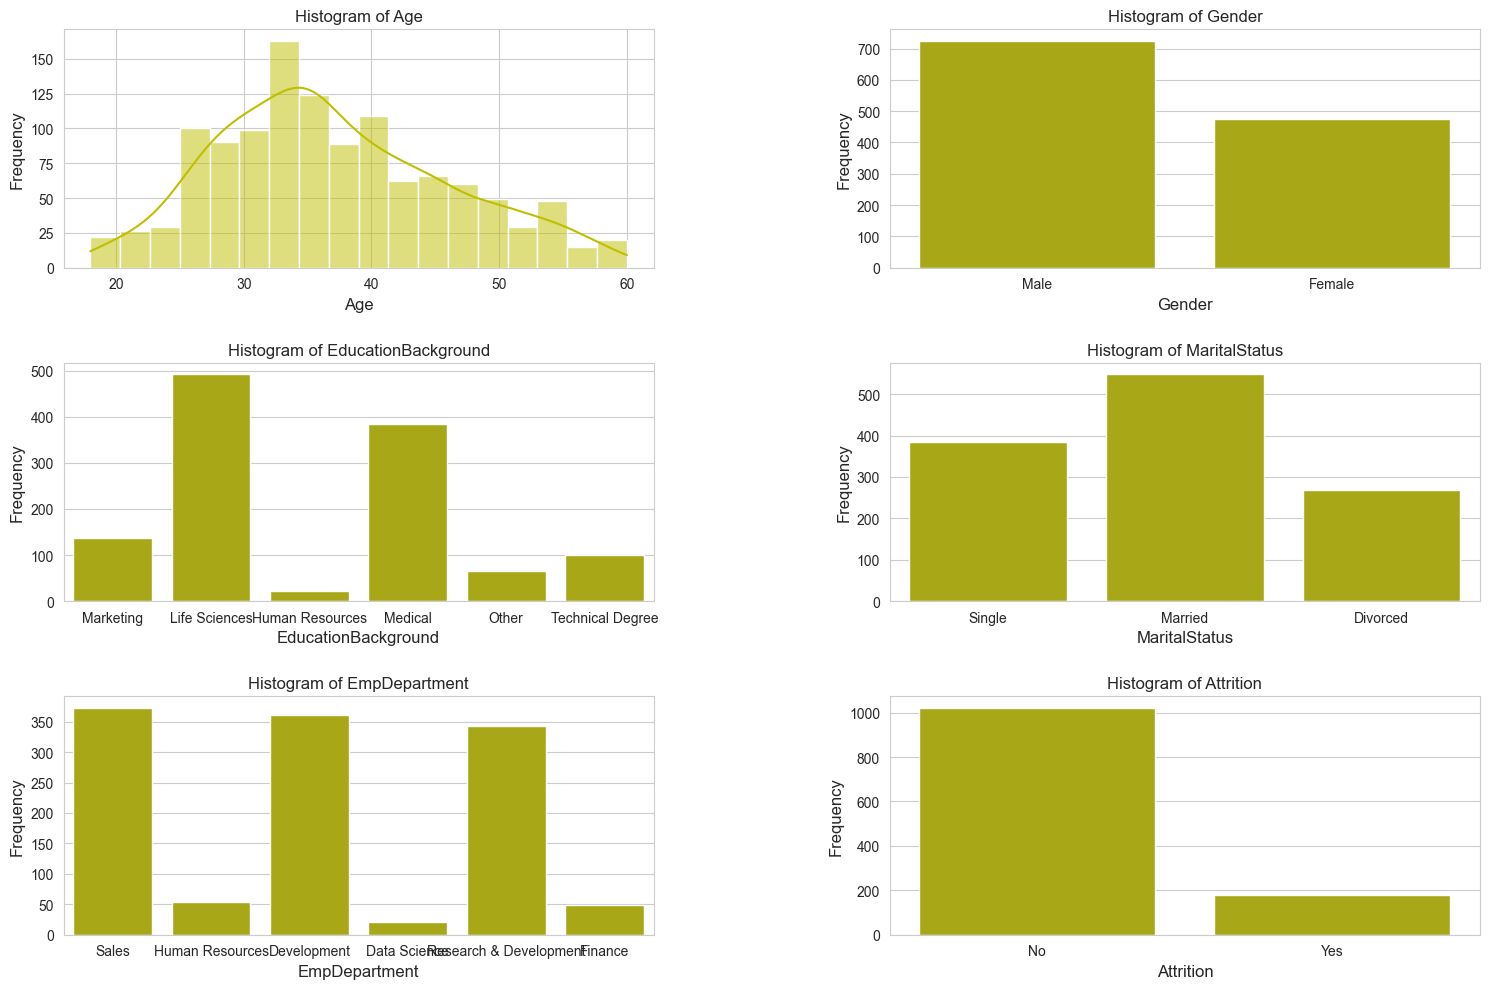

In [9]:
# Defining a function that takes the column name and data frame returning a visualization

def plot_histograms(df, columns, figsize=(15, 10), fontsize=12, bins='auto', color='y'):
    """
    This function plots histograms for specified columns in the data using subplots,
    choosing an appropriate plot type based on the data type.
    """
    n_cols = 2  # Number of columns per row for the subplot
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Ensure enough rows for the number of columns
    
    # Create figure with determined rows and columns
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, squeeze=False)
    axes = axes.flatten()  # Flatten the axes array for easy looping
    
    # Loop through the specified columns and plot appropriately
    for idx, column in enumerate(columns):
        if column in df.columns:
            # Check data type and choose the plot type
            if df[column].dtype.kind in 'bifc':  # Numeric types
                sns.histplot(df[column], ax=axes[idx], bins=bins, color=color, kde=True)
            else:  # Assume categorical type
                sns.countplot(x=df[column], ax=axes[idx], color=color)
                
            axes[idx].set_xlabel(column, fontsize=fontsize)
            axes[idx].set_ylabel('Frequency', fontsize=fontsize)
            axes[idx].set_title(f'Histogram of {column}', fontsize=fontsize)
        else:
            print(f"Column {column} not found in the dataset.")
            axes[idx].set_visible(False)  # Hide axis if column is not present
    
    # Adjust the layout to prevent overlap
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust horizontal and vertical spacing
    plt.show()

# Sample DataFrame creation
data =df
df = pd.DataFrame(data)

# Specify the columns to plot
columns = ['Age', 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'Attrition']

# Call the function
plot_histograms(df, columns)


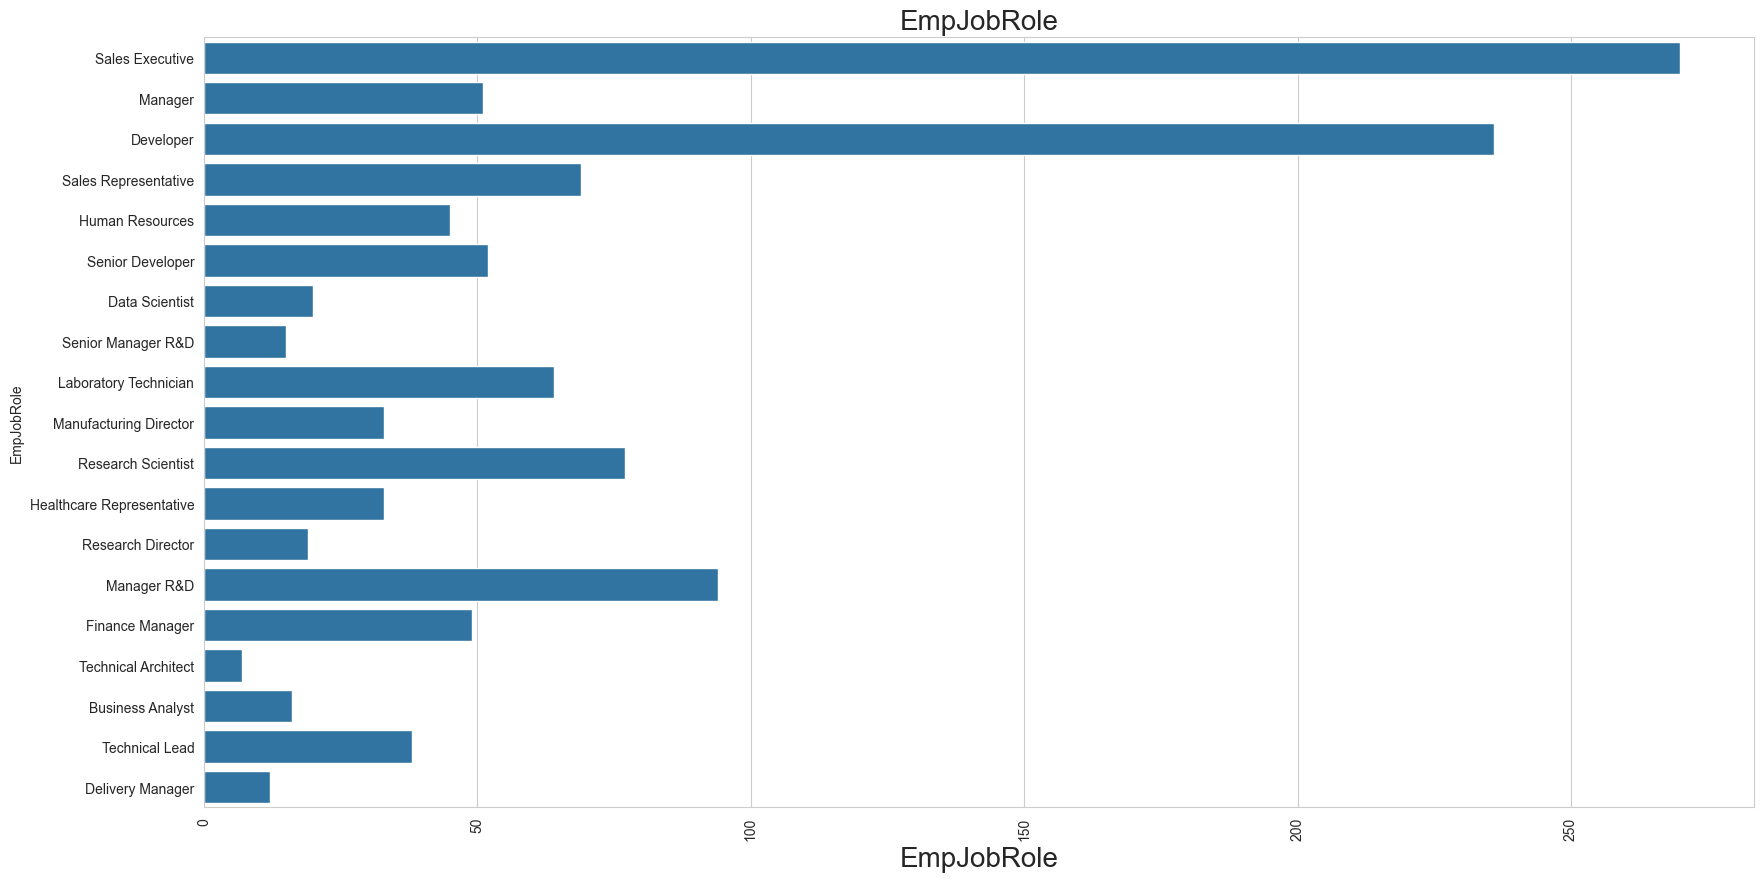

In [10]:
# visulizing EmpJobRole

plt.figure(figsize=(20,10))
sns.countplot(data.EmpJobRole)
plt.xticks(rotation='vertical')
plt.xlabel('EmpJobRole',fontsize=20)
plt.title('EmpJobRole',fontsize=20)
plt.show()


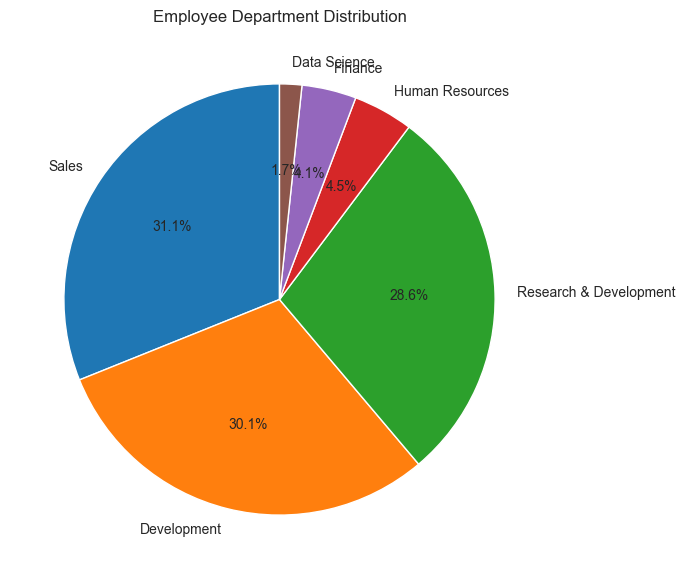

In [11]:
department_counts = df['EmpDepartment'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Employee Department Distribution')
plt.show()

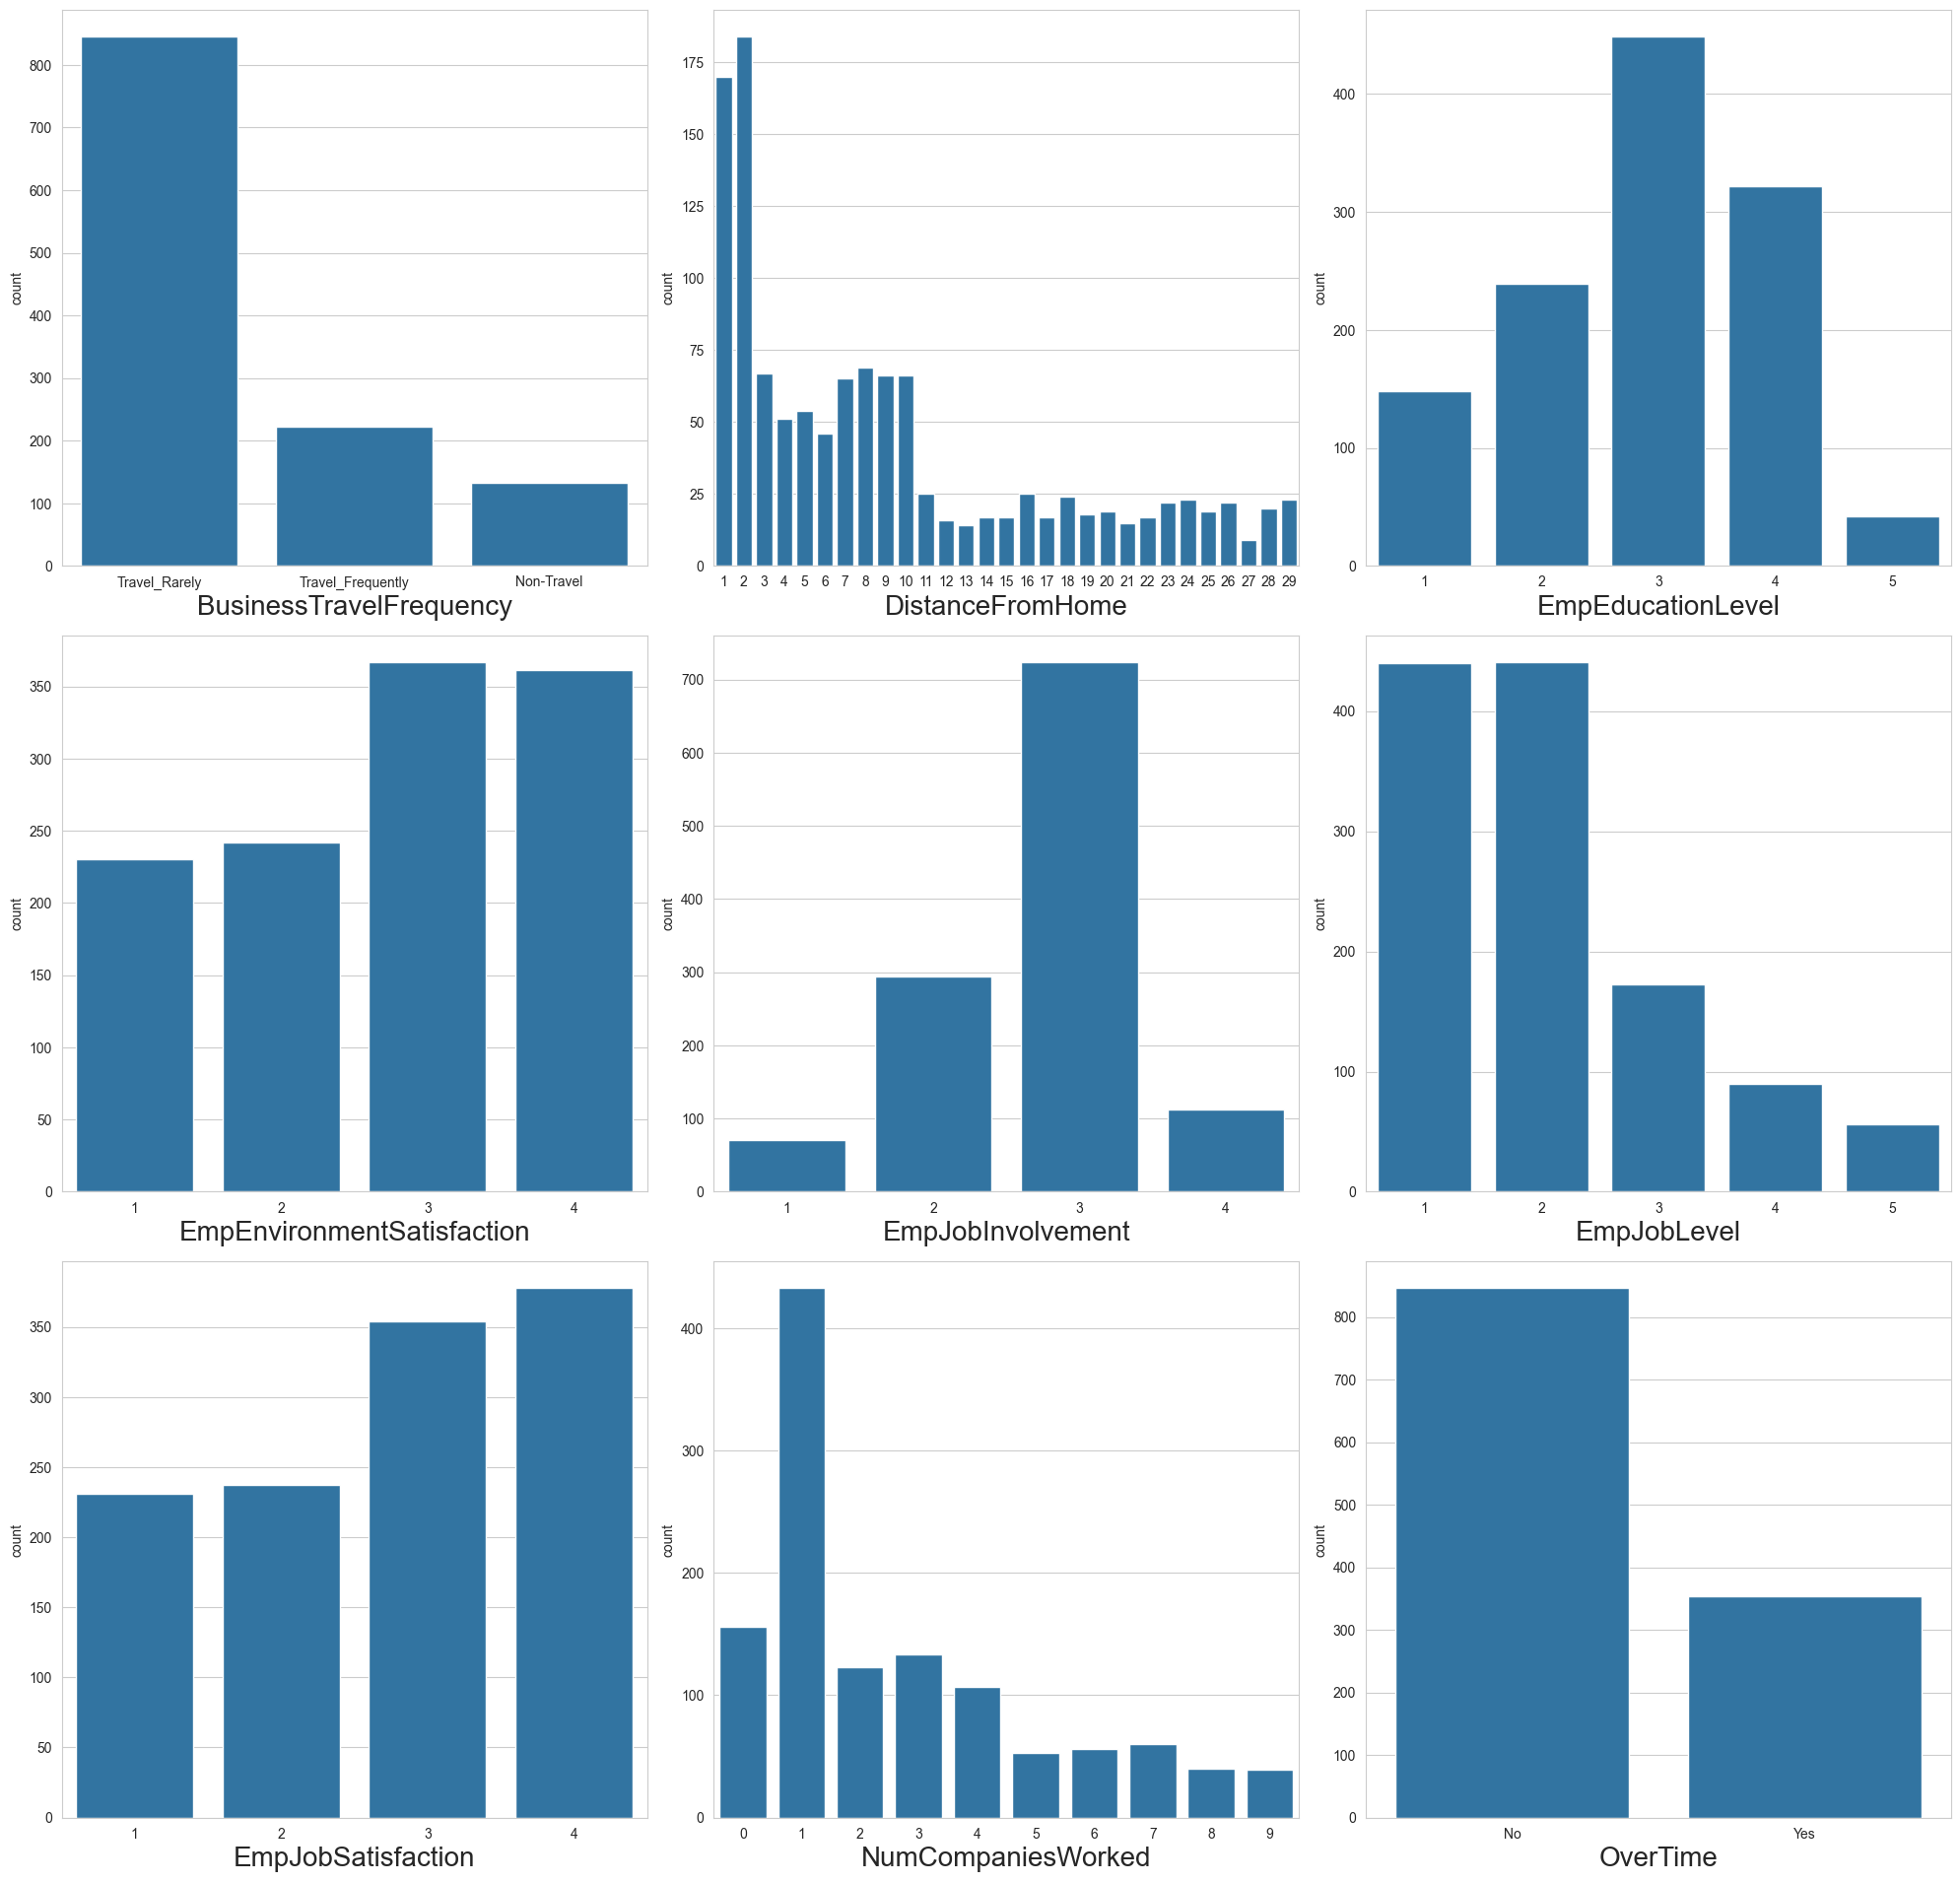

In [12]:
# Creating subplots to visualize indpendent colunms

list_col_names= df[['BusinessTravelFrequency','DistanceFromHome',
              'EmpEducationLevel', 'EmpEnvironmentSatisfaction','EmpJobInvolvement', 'EmpJobLevel',
              'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime']] # making lsit of next 12 feature

plt.figure(figsize=(20,25)) # defining canvas size
plotno = 1 # counter

for column in list_col_names: # iteration of columns / acessing the columns from count 
    if plotno<=13:    # set the limit
        plt.subplot(4,3,plotno) # # plotting 12 graphs (4-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=list_col_names[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

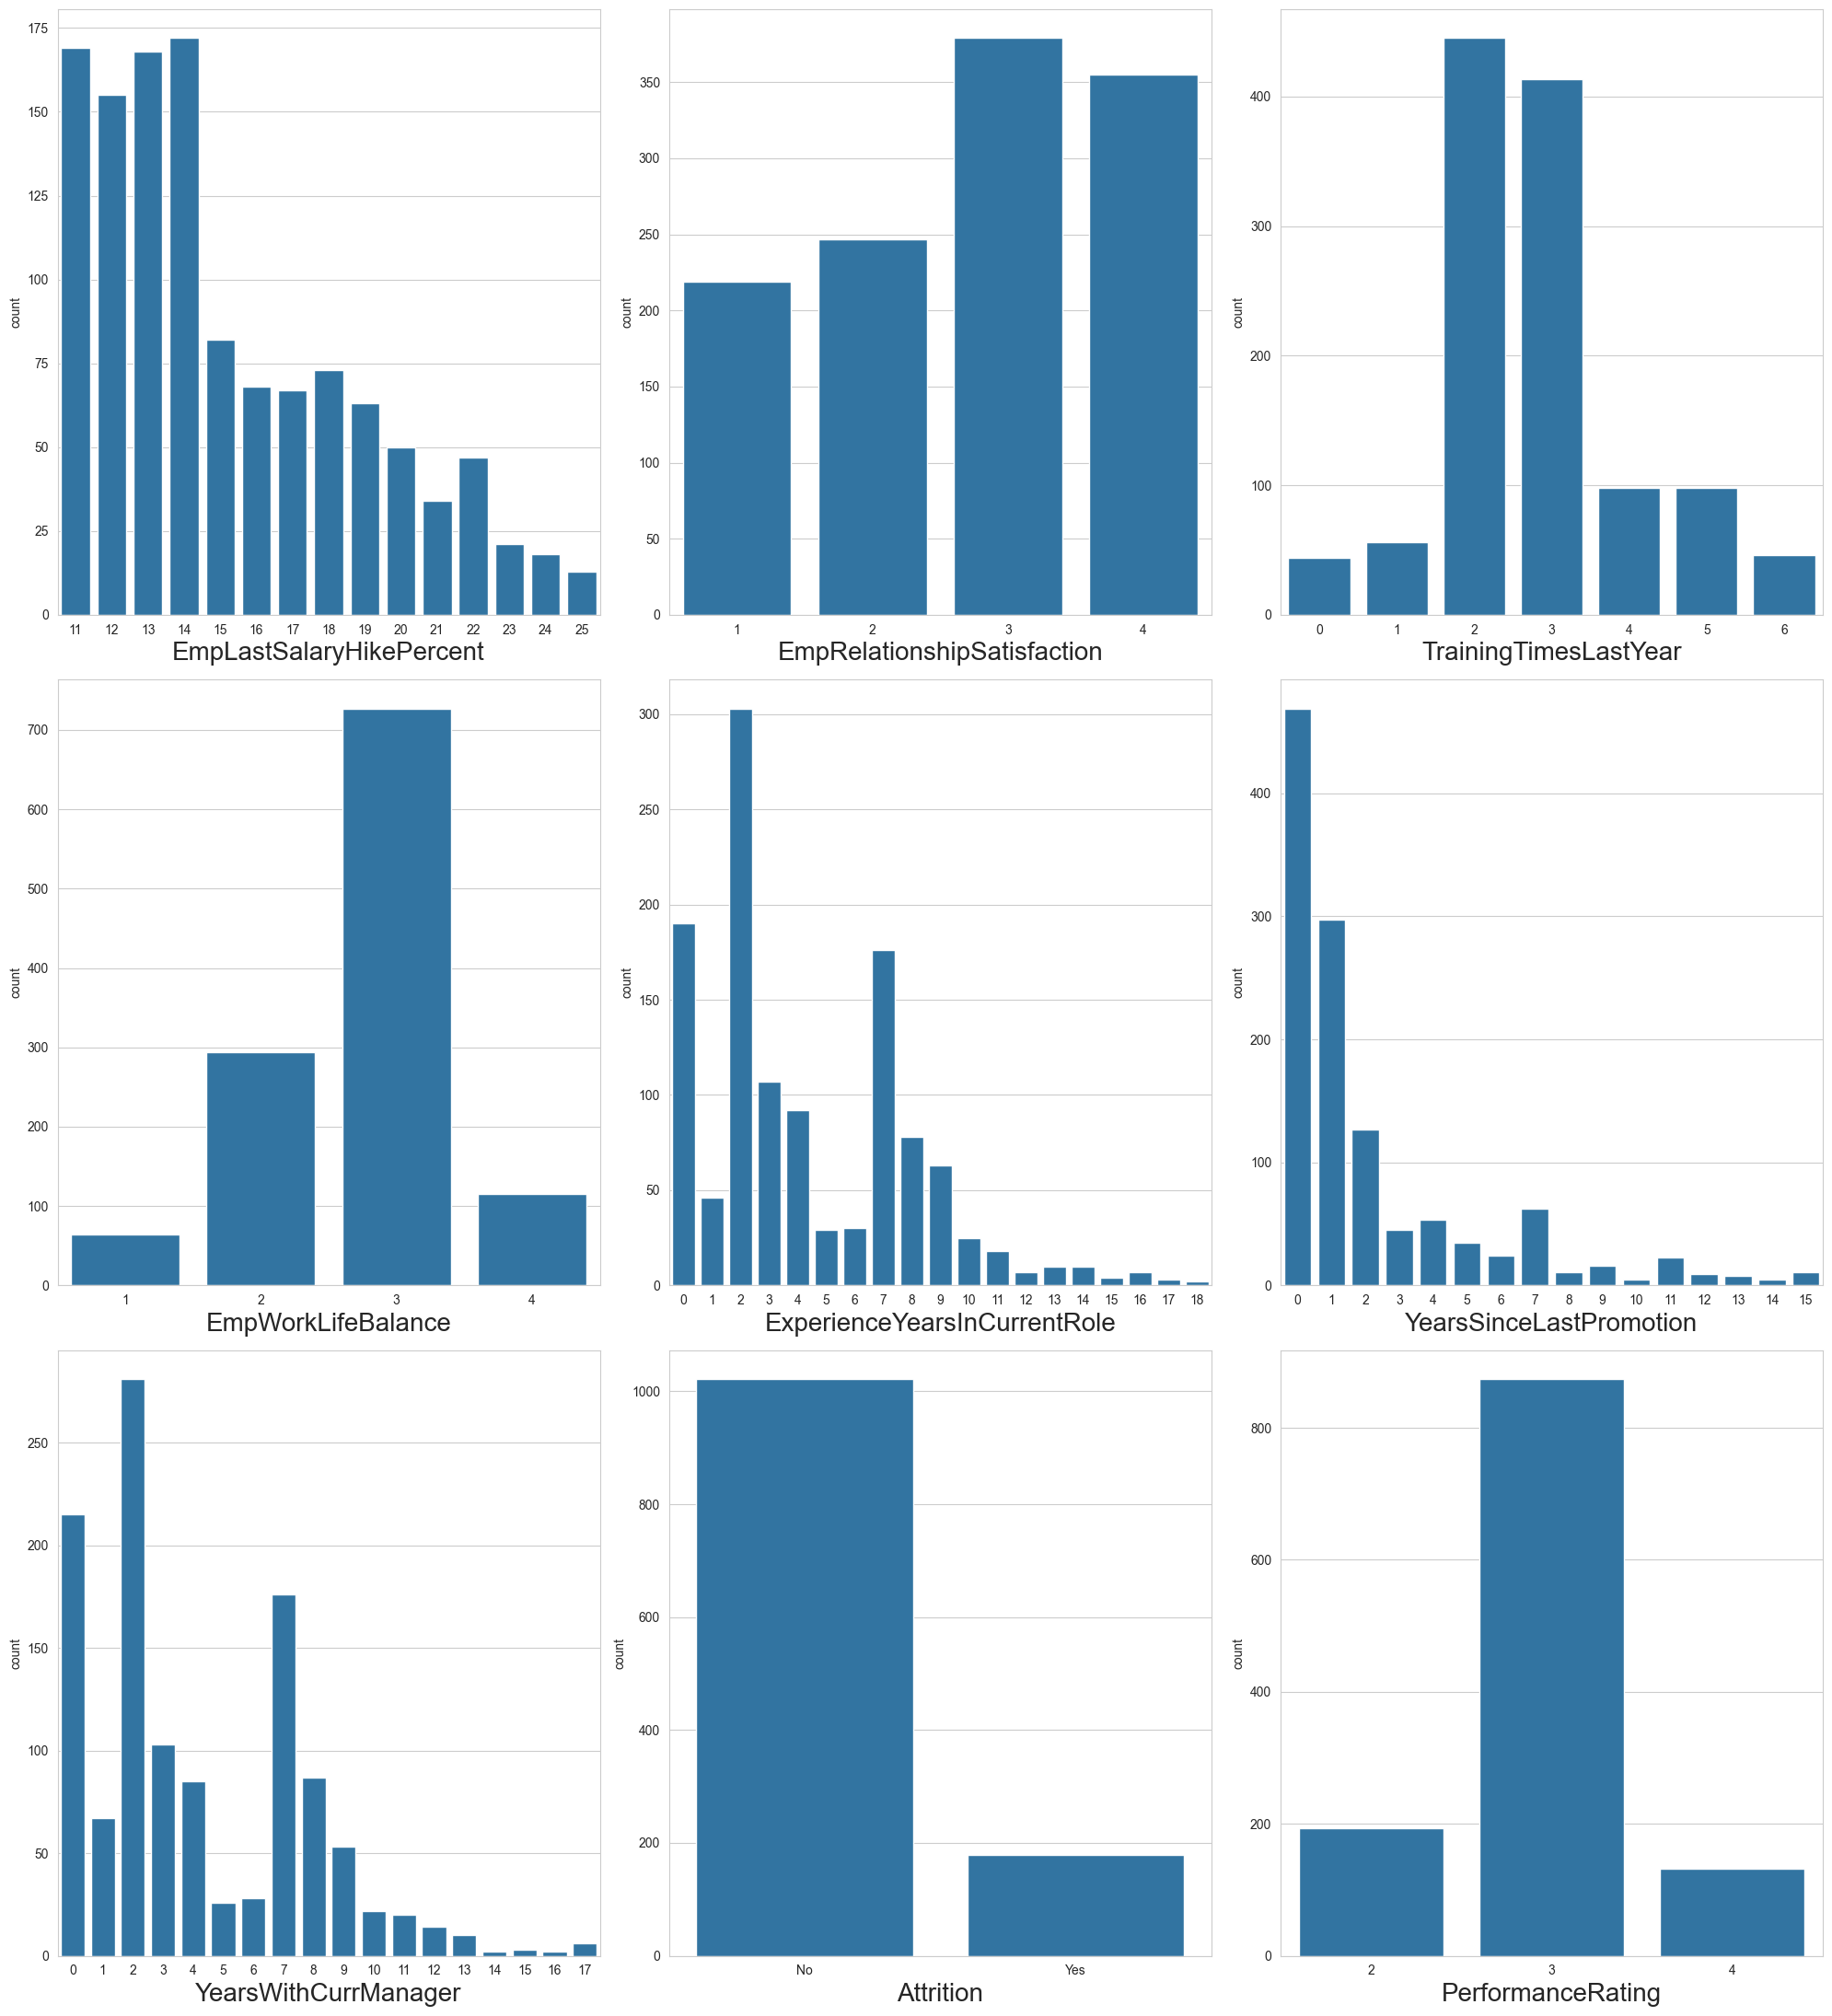

In [13]:
list_col_names2 = df[['EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TrainingTimesLastYear','EmpWorkLifeBalance',
               'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager', 'Attrition', 
               'PerformanceRating']]  #Making nex feature list to plot the graph

plt.figure(figsize=(20,22)) # defining canvas size
plotno = 1 # counter

for column in list_col_names2: # iteration of columns / acessing the columns from count 
    if plotno<=10:    # set the limit
        plt.subplot(3,3,plotno) # # plotting 9 graphs (3-rows,3-columns) ,plotnumber is for count
        sns.countplot(x=list_col_names2[column]) # Plotting count plots because the feature data type is discerte and categorical
        plt.xlabel(column,fontsize=20)  # assigning name to x-axis and font size is 20
    plotno+=1 # counter increment
plt.tight_layout()
plt.show() # used to hide the storage loction

#### Key findings from data exploration analysis

#### Summary for specific features 
cen fewer at level 4.


### Summary key insights 

### Biaviriate analysis

Plot used:

Histogram, line plot used for continuous features Count used for categorical & Discrete datas

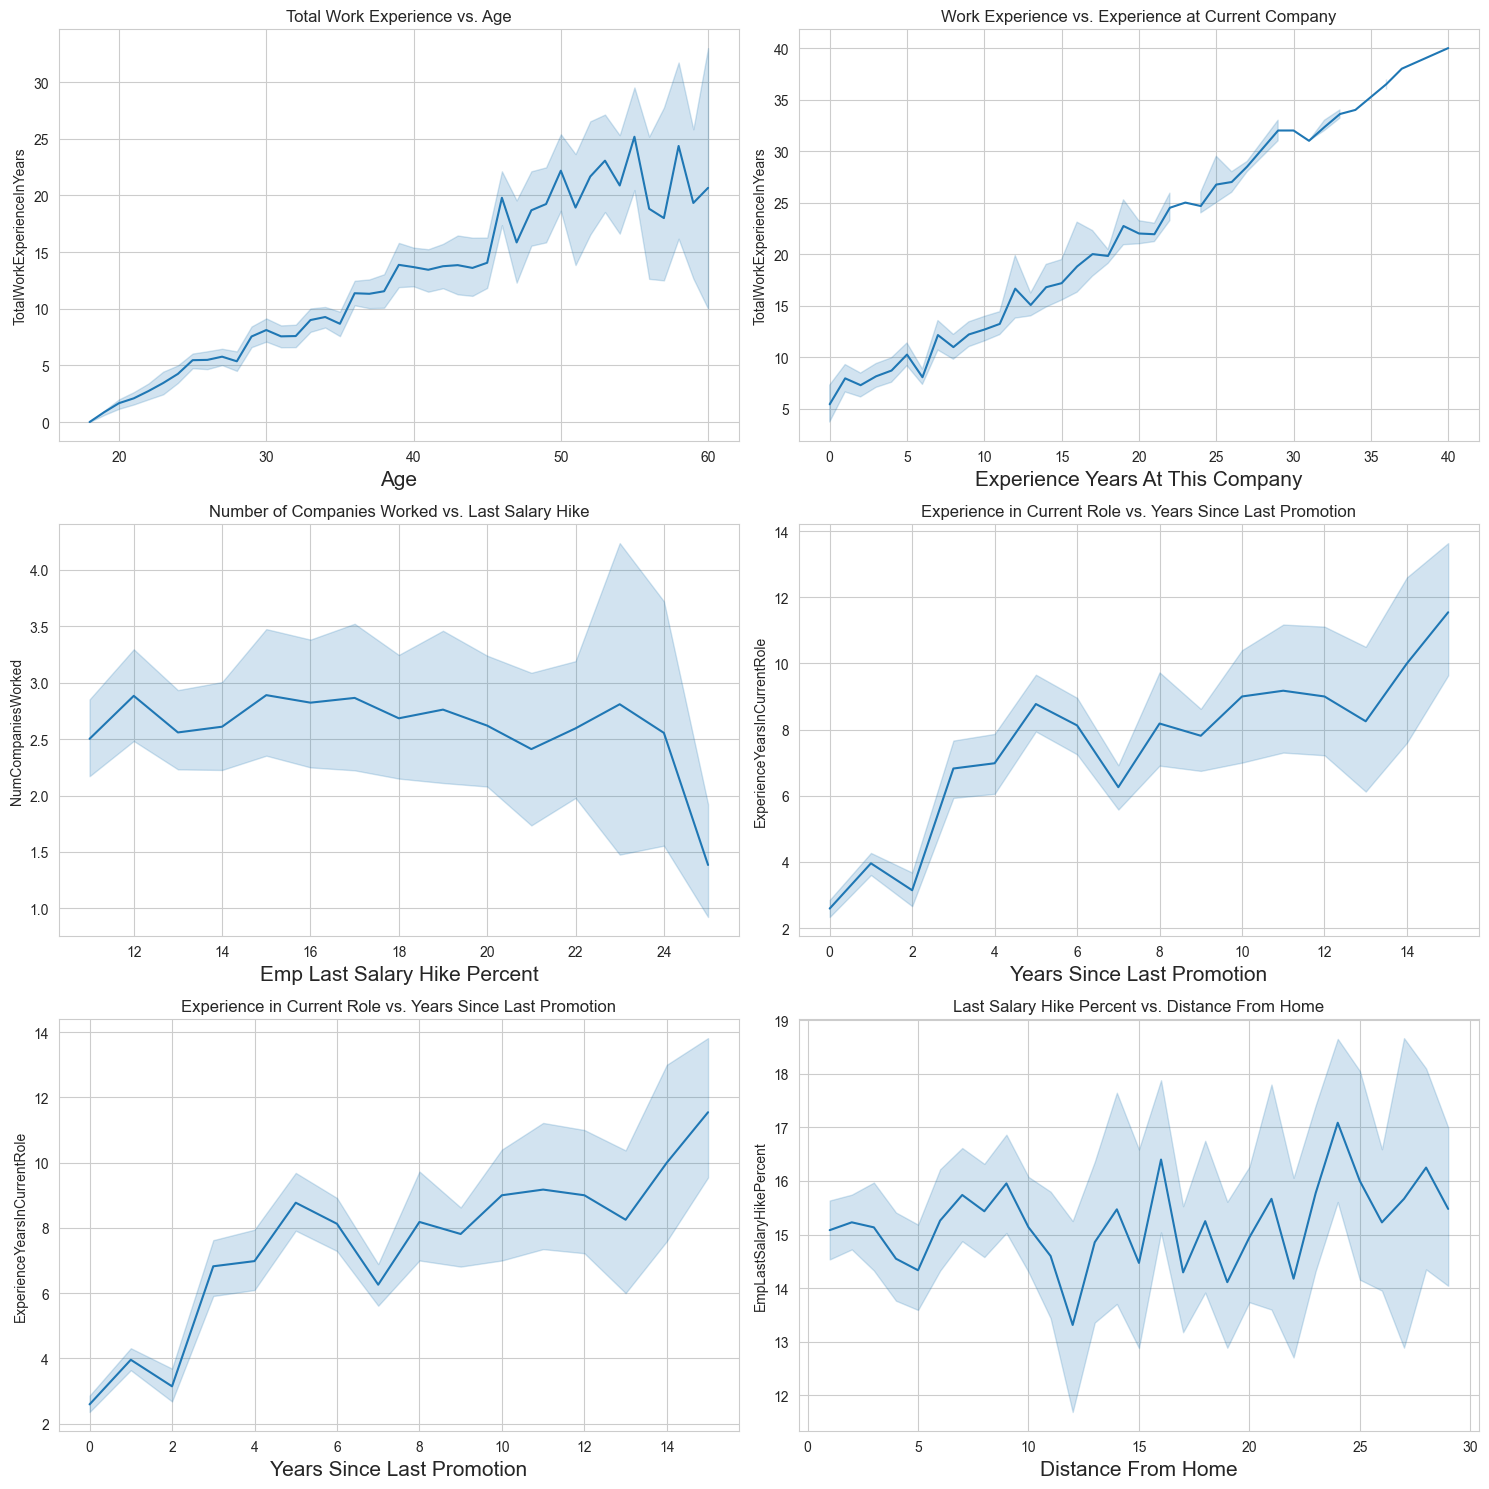

In [14]:
'''This code creats a 3x2 grid of line plots using Python's Matplotlib and Seaborn
to analyze relationships between various employment metrics in a DataFrame'''


fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Adjust the size as needed

# Top left plot
sns.lineplot(x='Age', y='TotalWorkExperienceInYears', data=df, ax=axs[0, 0])
axs[0, 0].set_xlabel('Age', fontsize=15)
axs[0, 0].set_title('Total Work Experience vs. Age')

# Top right plot
sns.lineplot(x='ExperienceYearsAtThisCompany', y='TotalWorkExperienceInYears', data=df, ax=axs[0, 1])
axs[0, 1].set_xlabel('Experience Years At This Company', fontsize=15)
axs[0, 1].set_title('Work Experience vs. Experience at Current Company')

# Middle left plot
sns.lineplot(x='EmpLastSalaryHikePercent', y='NumCompaniesWorked', data=df, ax=axs[1, 0])
axs[1, 0].set_xlabel('Emp Last Salary Hike Percent', fontsize=15)
axs[1, 0].set_title('Number of Companies Worked vs. Last Salary Hike')

# Middle right plot
sns.lineplot(x='YearsSinceLastPromotion', y='ExperienceYearsInCurrentRole', data=df, ax=axs[1, 1])
axs[1, 1].set_xlabel('Years Since Last Promotion', fontsize=15)
axs[1, 1].set_title('Experience in Current Role vs. Years Since Last Promotion')

# Bottom left plot
sns.lineplot(x='YearsSinceLastPromotion', y='ExperienceYearsInCurrentRole', data=df, ax=axs[2, 0])
axs[2, 0].set_xlabel('Years Since Last Promotion', fontsize=15)
axs[2, 0].set_title('Experience in Current Role vs. Years Since Last Promotion')

# Bottom right plot
sns.lineplot(x='DistanceFromHome', y='EmpLastSalaryHikePercent', data=df, ax=axs[2, 1])
axs[2, 1].set_xlabel('Distance From Home', fontsize=15)
axs[2, 1].set_title('Last Salary Hike Percent vs. Distance From Home')

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

#### Summary key features relationships

1.	Age and Experience Correlation:
2.	Employees aged 18-25 usually have less than 5 years of experience, indicating that total work experience increases with age.
3.	Company Tenure and Total Experience:
4.	The longer an employee works at the same company, the greater their overall work experience, highlighting the accumulation of expertise over time.
5.	Number of Previous Employers and Recent Salary Hikes:
6.	Employees who have worked for fewer companies tend to receive larger salary increases, possibly reflecting a reward for loyalty or stability.
7.	Promotions and Experience in Current Role:
8.	More years since the last promotion typically means more experience in the current role, suggesting employees might not quickly ascend to higher positions despite their expertise.
9.	Hourly Rate and Tenure with Current Manager:
10.	While most employees' hourly rates are consistent regardless of their tenure with a current manager, some achieve high rates quickly, possibly due to performance or negotiation.
11.	Commute Distance and Salary Hikes:
12.	Longer commuting distances are often compensated with higher salary hikes, but there’s a specific dip in hikes for commutes between 10 to 13 miles, indicating possible local influences on compensation policies.


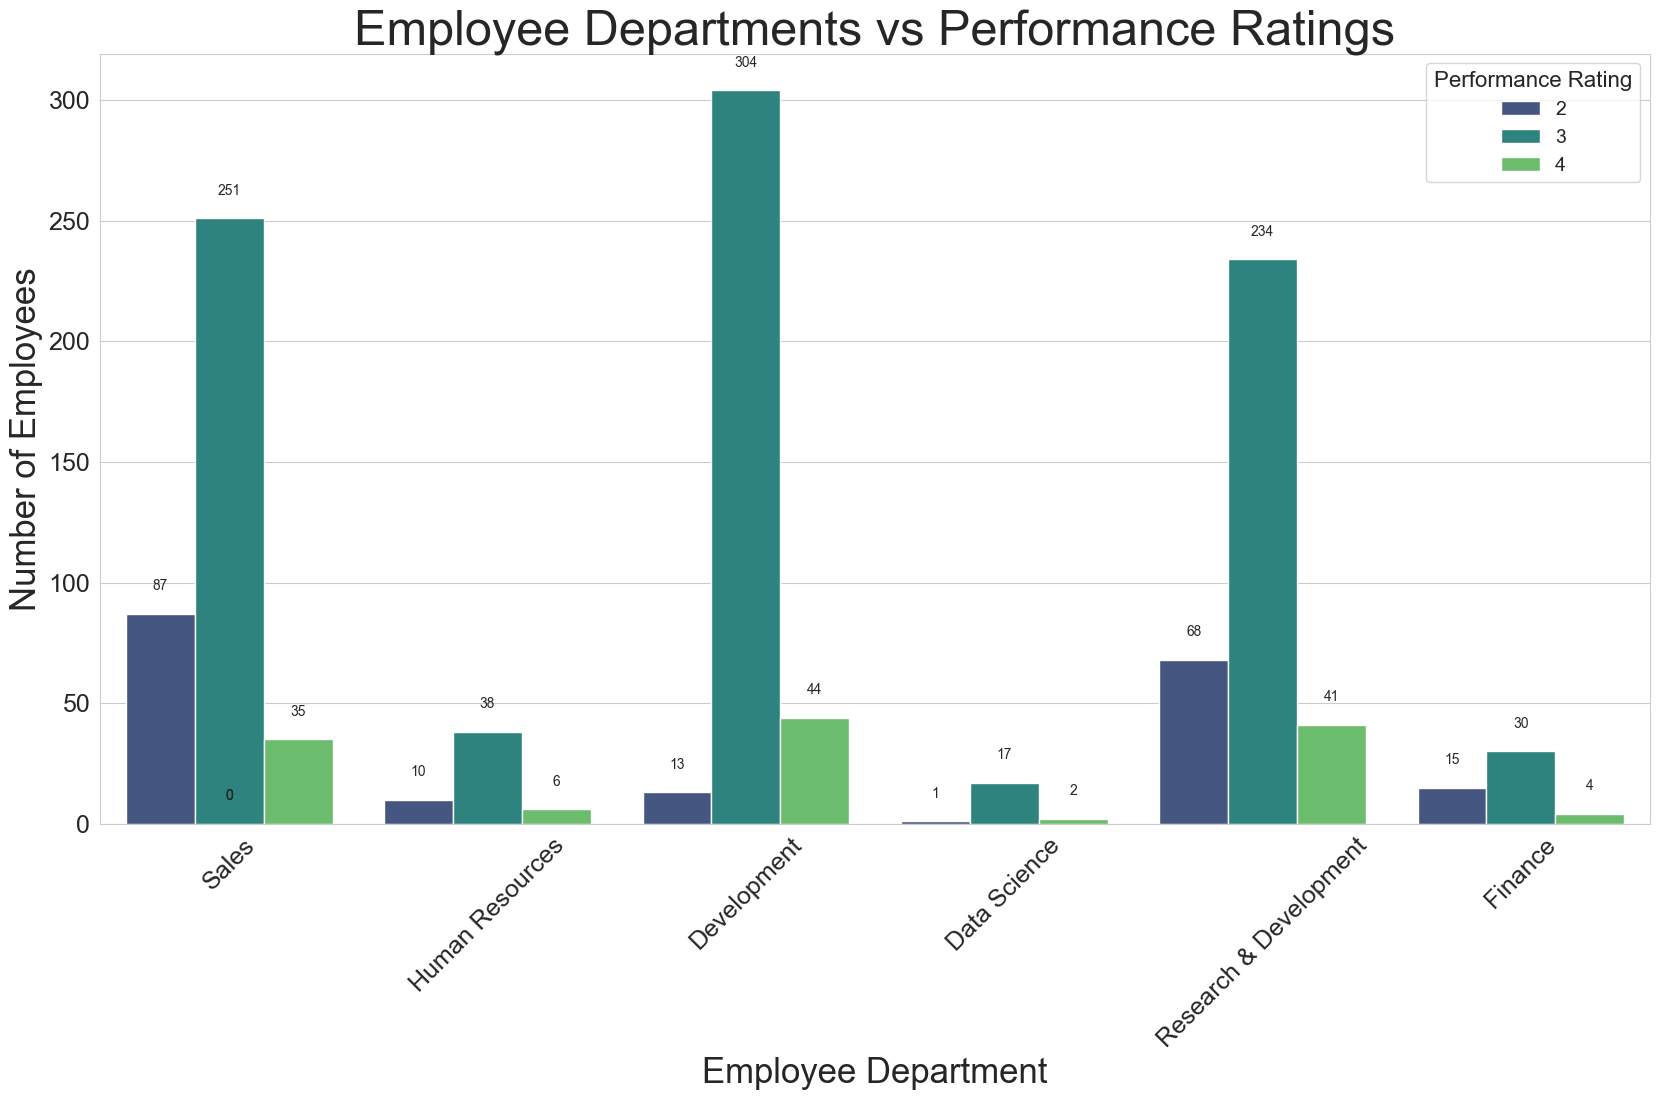

In [15]:
# This code generates a bar plot that displays the counts of employees within each department, categorized by performance rating

plt.figure(figsize=(20, 10))

# Choose a diverse color palette
palette = sns.color_palette("viridis", n_colors=df['PerformanceRating'].nunique())

# Create a countplot
ax = sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=df, palette=palette)

# Annotate each bar with the count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 20), 
                textcoords = 'offset points')

# Improve plot aesthetics with larger font sizes for better readability
ax.set_title('Employee Departments vs Performance Ratings', fontsize=35) 
ax.set_xlabel('Employee Department', fontsize=25)  
ax.set_ylabel('Number of Employees', fontsize=25)  
ax.legend(title="Performance Rating", title_fontsize='16', fontsize='14')  # Increased legend font size

# Adjust the x-axis labels to avoid overlapping and ensure they are readable
plt.xticks(rotation=45, fontsize=18)  
plt.yticks(fontsize=18)  # Increase y-axis ticks font size


# Display the plot
plt.show()

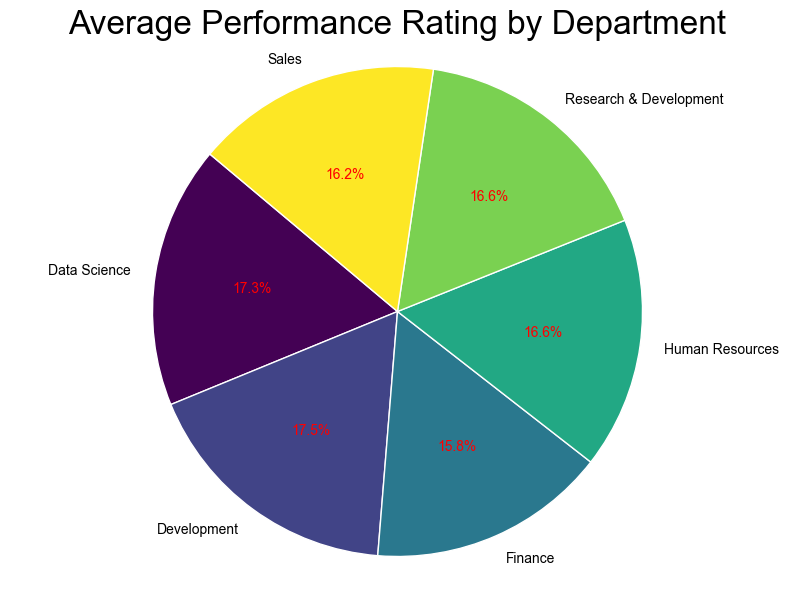

In [16]:
department_performance = df.groupby('EmpDepartment')['PerformanceRating'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 7))  # Adjust size to better fit a pie chart

# Creating the pie chart
pie_wedges = plt.pie(department_performance['PerformanceRating'], 
                     labels=department_performance['EmpDepartment'], 
                     autopct='%1.1f%%', startangle=140, 
                     colors=plt.cm.viridis(np.linspace(0, 1, len(department_performance['EmpDepartment']))))

# Add a title
plt.title('Average Performance Rating by Department', fontsize=24, color='black')

# Change the font color of labels and autopct to white
for text in pie_wedges[1]:
    text.set_color('black')
for autotext in pie_wedges[2]:
    autotext.set_color('r')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  

# Show plot
plt.show()

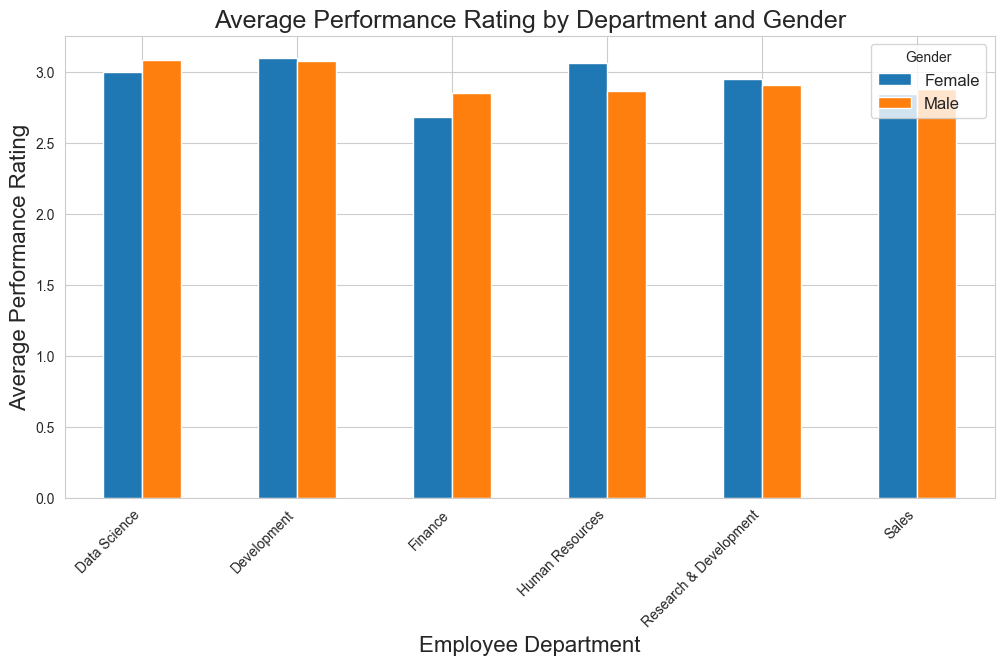

In [17]:
# This  code calculate the average performance ratings of employees, grouped by department and gender.

average_ratings = df.groupby(['EmpDepartment', 'Gender'])['PerformanceRating'].mean().unstack()

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
average_ratings.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e'])  # Two colors for male and female

# Add labels and title
ax.set_xlabel('Employee Department', fontsize=16)
ax.set_ylabel('Average Performance Rating', fontsize=16)
ax.set_title('Average Performance Rating by Department and Gender', fontsize=18)
ax.legend(title='Gender', fontsize=12)


# Customize the tick labels for better readability
ax.set_xticklabels(average_ratings.index, rotation=45, ha='right')

# Show the plot
plt.show()


### Key Factors: Department-Wise Performance
#### Data insights show the following:

1. DataScience: The highest average of level 3 performance is in data science department. Data science is the only department with less number of level 2 performers. The overall performance is higher compared to all departments. Male employees are doing good in this department.
2. Development:The maximum number of employees are level 3 performers.The gender-based performance is nearly same for both. Development depertment has the highiest number of level 4 performers.
3. Finance: The male employees are doing good. It is also observed that Finance depertmenrt is the least performing by average
4. Human Resource:The majority of the employees lying under the level 3 performance . The female employees in HR department doing really well in their performance.
5. Research and develpment: The Reserch and develpment has the good female employees in their performance.
6. sales: The Performace rating level 3 is more in the sales department. The male performance rating the little bit higher compared to female.

### Multiviriate analysis

Checking the relationship between two features with respect to target features

PLOT USED:

Line plot: A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency of each value. Barplot: It shows the relationship between a numeric and a categoric variable. Each entity of the categoric variable is represented as a bar. The size of the bar represents its numeric value.


#### 1.Check the relationship between Age & Total work experiance with respect to target feature

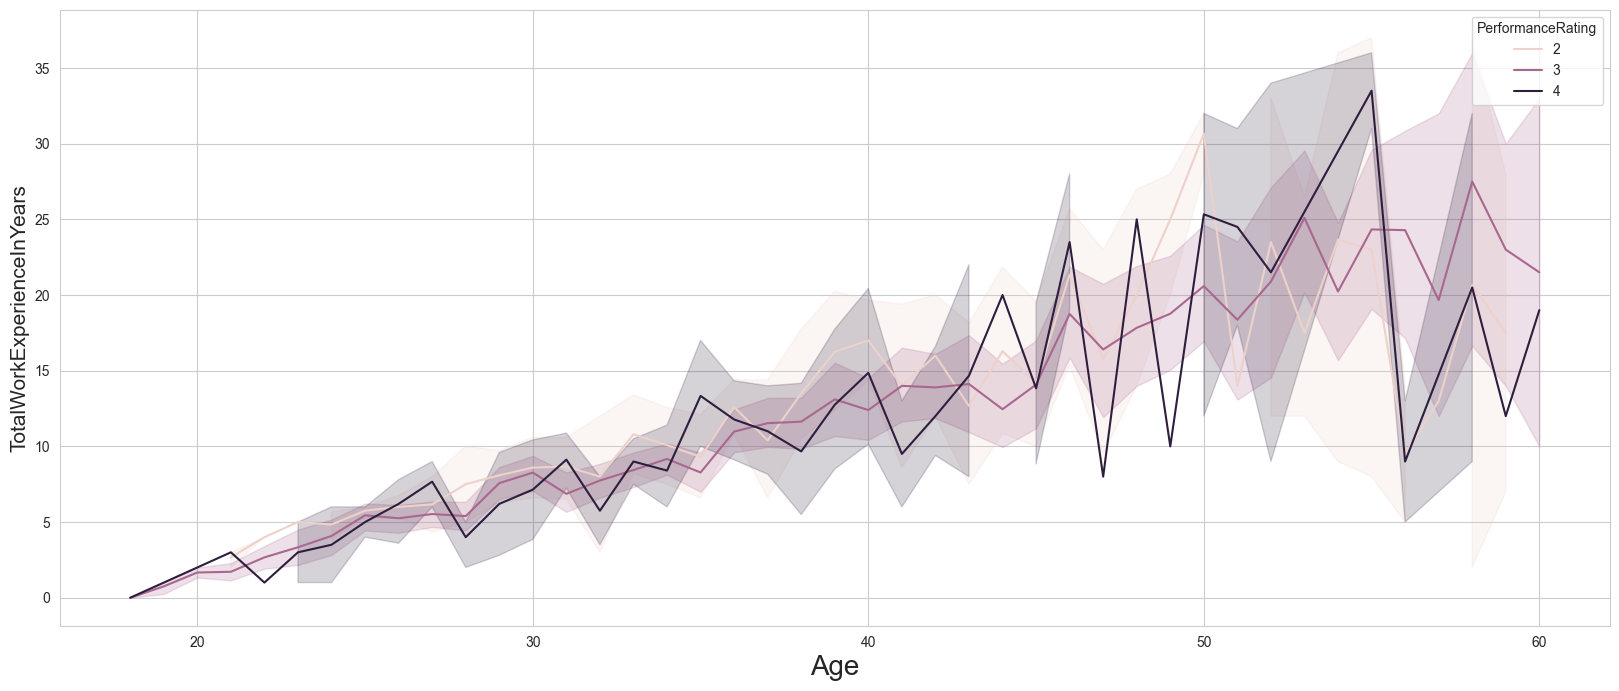

In [18]:
# plot shows the relationship between Age & Total work experiance with respect to target feature

plt.figure(figsize=(20,8))
sns.lineplot(x='Age',y='TotalWorkExperienceInYears',hue=data.PerformanceRating,data=df)
plt.xlabel('Age',fontsize=20)
plt.ylabel('TotalWorkExperienceInYears',fontsize=15)
plt.show()

Observation:

If the age & total experiance is increases that time most of the employee performance rating is 4.
Low age and minimum year experiance employee also 4 perfomace rating.
At the age of 50 and 30 years of experiance employee have 2 performance rating.

### 2. Check the relationship between Gender & Number Companies Worked with respect to target feature

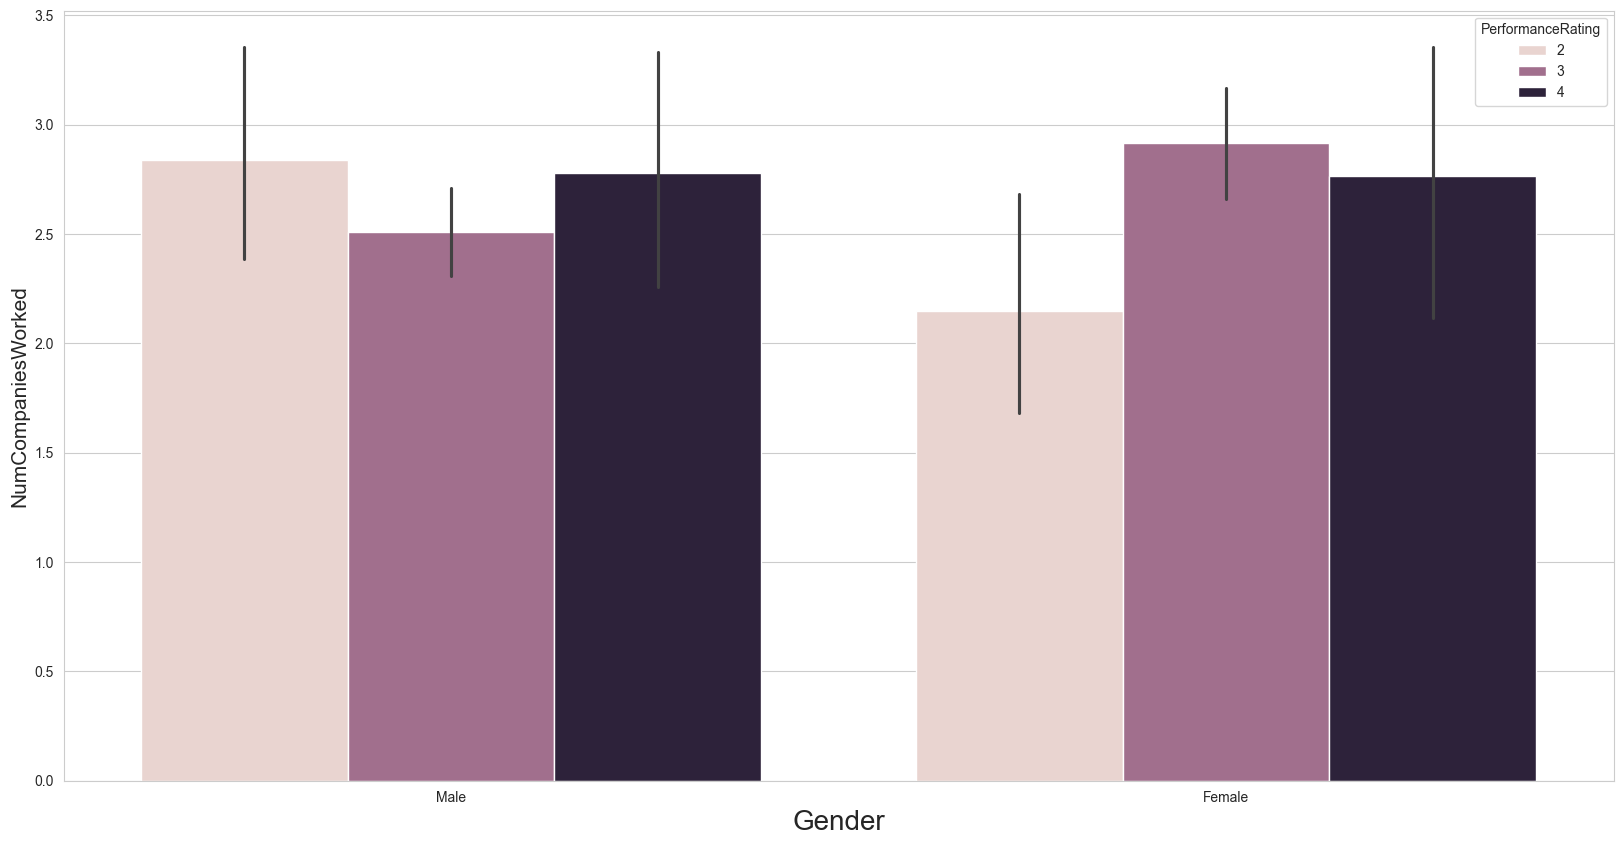

In [19]:
# Check the relationship between Gender & Number Companies Worked with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='Gender',y='NumCompaniesWorked',hue=data.PerformanceRating,data=data)
plt.xlabel('Gender',fontsize=20)
plt.ylabel('NumCompaniesWorked',fontsize=15)
plt.show()

Observation:

If the gender is male and no of companies work is increses that time most of the performance rating is 2 & 4.
If female work in less no companies that time performance rating is 2.
3 & 4 performance rating in female increase if the no of compaines worked is increses.

### 3. Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature

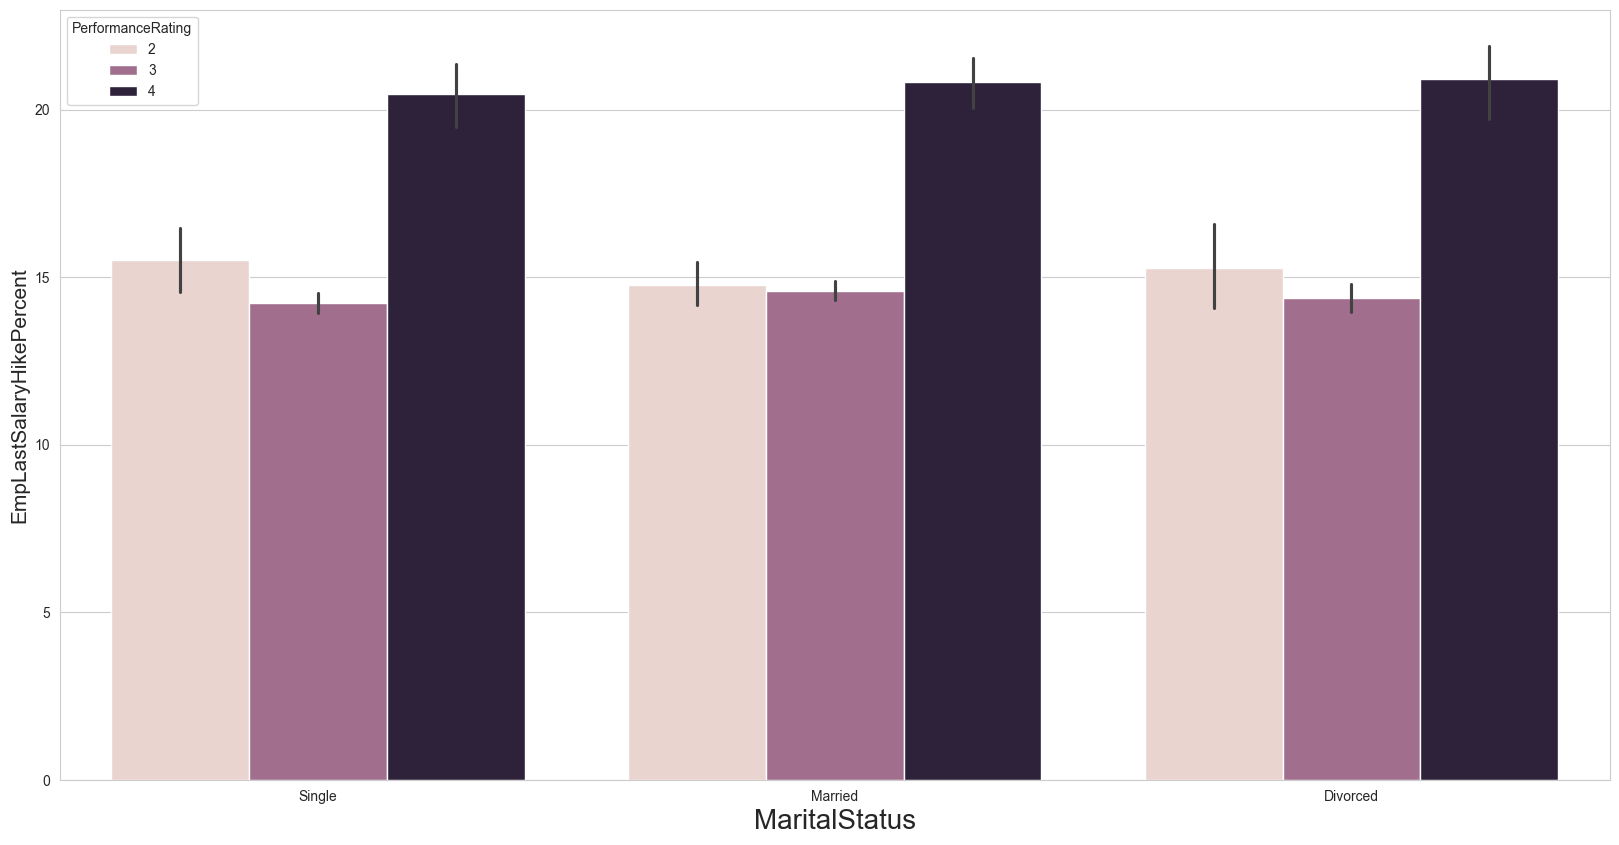

In [20]:
# Check the relationship between MaritalStatus & EmpLastSalaryHikePercent with respect to target feature

plt.figure(figsize=(20,10))
sns.barplot(x='MaritalStatus',y='EmpLastSalaryHikePercent',hue=data.PerformanceRating,data=data)
plt.xlabel('MaritalStatus',fontsize=20)
plt.ylabel('EmpLastSalaryHikePercent',fontsize=15)
plt.show()

Observaton:

In all marital status with maximum salary hike percent in last year is increases that time performance rating is 4.
If salary hike percentage in last year is less than 15 that time performance rating is 2 & 3 in all marital status.

### 4. Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature

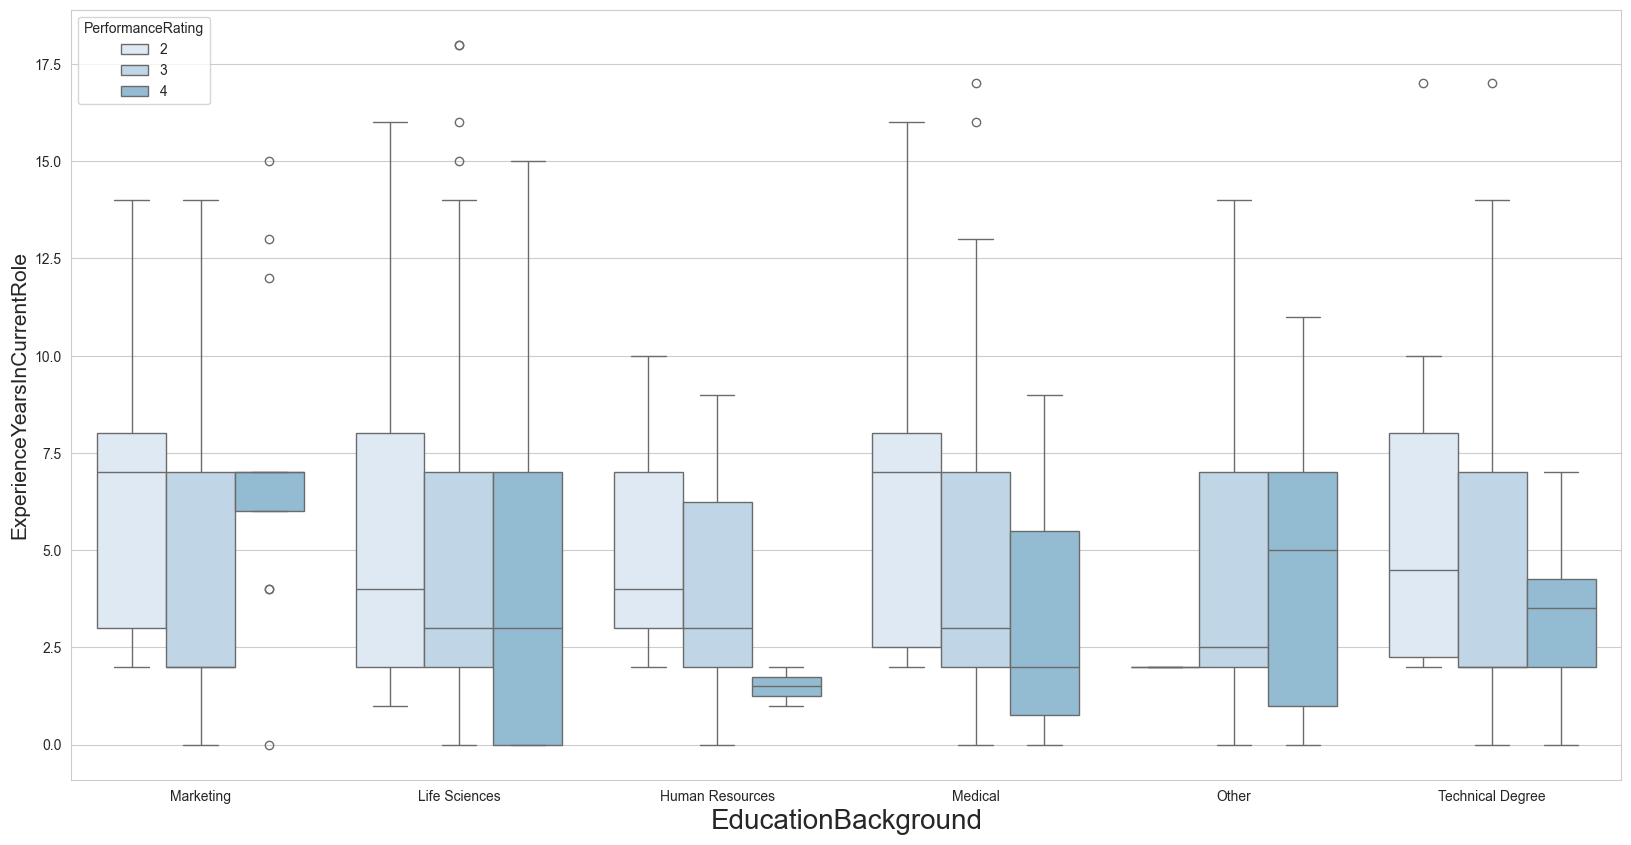

In [21]:
# Check the relationship between EducationBackground & ExperienceYearsInCurrentRole with respect to target feature


# Define the blue palette
blue_palette = sns.color_palette('Blues')

# Data loading and plotting code, example with a barplot
plt.figure(figsize=(20, 10))
sns.boxplot(x='EducationBackground', y='ExperienceYearsInCurrentRole', hue='PerformanceRating', data=data, palette=blue_palette)
plt.xlabel('EducationBackground', fontsize=20)
plt.ylabel('ExperienceYearsInCurrentRole', fontsize=15)
plt.show()

Observation:

If the current role experiance is increses of marketing education background employee has 4 performance rating most of the time
In all education background with current role experiance is more than 5 then the performance rating of employee is 2.
Life scineces, Medical, others , and technical degree education background employee has less than 4 year of experiance in current role that time performance rating is 3 & 4.

## 3. Data Preprocessing 

#### Importing libraries

In [22]:
# importing libraries 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from joblib import dump, load
from scipy.stats import boxcox


In [23]:
# checking for missing values to ensure that missing values are handled before modeling our data

df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [24]:
# checking for duplicate values 

df.duplicated().sum()

0

#### Creating filter list for categorical and numerical column names

In [25]:
# seperating numerical variables from categorical variables; this will allow performing specific to data types... like encording

# Creating the list using list comprehension to filter data in the data frame by data type returning a list of dataframe colunm names 
Cat_cols =[i for i in df.columns if df[i].dtype=="object" ]
numerical_cols = [i for i in df.columns if df[i].dtype!="object" ]

In [26]:
Cat_cols

['EmpNumber',
 'Gender',
 'EducationBackground',
 'MaritalStatus',
 'EmpDepartment',
 'EmpJobRole',
 'BusinessTravelFrequency',
 'OverTime',
 'Attrition']

#### Handling categorical colunms

In [27]:
# converting categorical virables to numerical variables with the help of requency encoder 

def frequency_encoding(dataframe, categorical_vals, save_path=None):
    """
    Encodes categorical columns in a DataFrame based on the frequency of each category's occurrence.
    The function calculates the frequency of each unique value in the specified categorical columns
    and replaces the categorical value with its frequency. It can also serialize and save the 
    mapping dictionary for later use using joblib.
        DataFrame with categorical values replaced by frequencies.
    """
    # Copying the dataframe to avoid modifying the original data
    dataframe = dataframe.copy()

    # Dictionary to hold frequency mappings for each categorical column
    mappings = {}

    # Process each column specified in categorical_vals
    for column in categorical_vals:
        # Compute frequency of each value in the column
        freq = dataframe[column].value_counts(normalize=True)
        # Map frequencies to the categorical values in the column
        dataframe[column] = dataframe[column].map(freq)
        # Store the computed frequencies in the mappings dictionary
        mappings[column] = freq.to_dict()
    
    # Optionally save the mappings to a file if a path is provided
    if save_path:
        dump(mappings, save_path)
    
    # Return the modified dataframe with categories replaced by their frequencies
    return dataframe

# Example usage
df_2 = frequency_encoding(df, Cat_cols, save_path='frequency_mappings.joblib')


In [28]:
# checking df_2 data frame

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   EmpNumber                     1200 non-null   float64
 1   Age                           1200 non-null   int64  
 2   Gender                        1200 non-null   float64
 3   EducationBackground           1200 non-null   float64
 4   MaritalStatus                 1200 non-null   float64
 5   EmpDepartment                 1200 non-null   float64
 6   EmpJobRole                    1200 non-null   float64
 7   BusinessTravelFrequency       1200 non-null   float64
 8   DistanceFromHome              1200 non-null   int64  
 9   EmpEducationLevel             1200 non-null   int64  
 10  EmpEnvironmentSatisfaction    1200 non-null   int64  
 11  EmpHourlyRate                 1200 non-null   int64  
 12  EmpJobInvolvement             1200 non-null   int64  
 13  Emp

In [29]:
df_2

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0.000833,32,0.604167,0.114167,0.320000,0.310833,0.225000,0.705,10,3,...,4,10,2,2,10,7,0,8,0.851667,3
1,0.000833,47,0.604167,0.114167,0.320000,0.310833,0.225000,0.705,14,4,...,4,20,2,3,7,7,1,7,0.851667,3
2,0.000833,40,0.604167,0.410000,0.456667,0.310833,0.225000,0.185,5,4,...,3,20,2,3,18,13,1,12,0.851667,4
3,0.000833,41,0.604167,0.017500,0.223333,0.045000,0.042500,0.705,10,4,...,2,23,2,2,21,6,12,6,0.851667,3
4,0.000833,60,0.604167,0.114167,0.320000,0.310833,0.225000,0.705,16,4,...,4,10,1,3,2,2,2,2,0.851667,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.000833,27,0.395833,0.320000,0.223333,0.310833,0.225000,0.185,3,1,...,2,6,3,3,6,5,0,4,0.851667,4
1196,0.000833,37,0.604167,0.410000,0.320000,0.300833,0.043333,0.705,10,2,...,1,4,2,3,1,0,0,0,0.851667,3
1197,0.000833,50,0.604167,0.320000,0.456667,0.300833,0.043333,0.705,28,1,...,3,20,3,3,20,8,3,8,0.851667,3
1198,0.000833,34,0.395833,0.320000,0.320000,0.016667,0.016667,0.705,9,3,...,2,9,3,4,8,7,7,7,0.851667,3


All the colunme have been converted to numerical values 

#### Handling numerical columns and detecting outliers

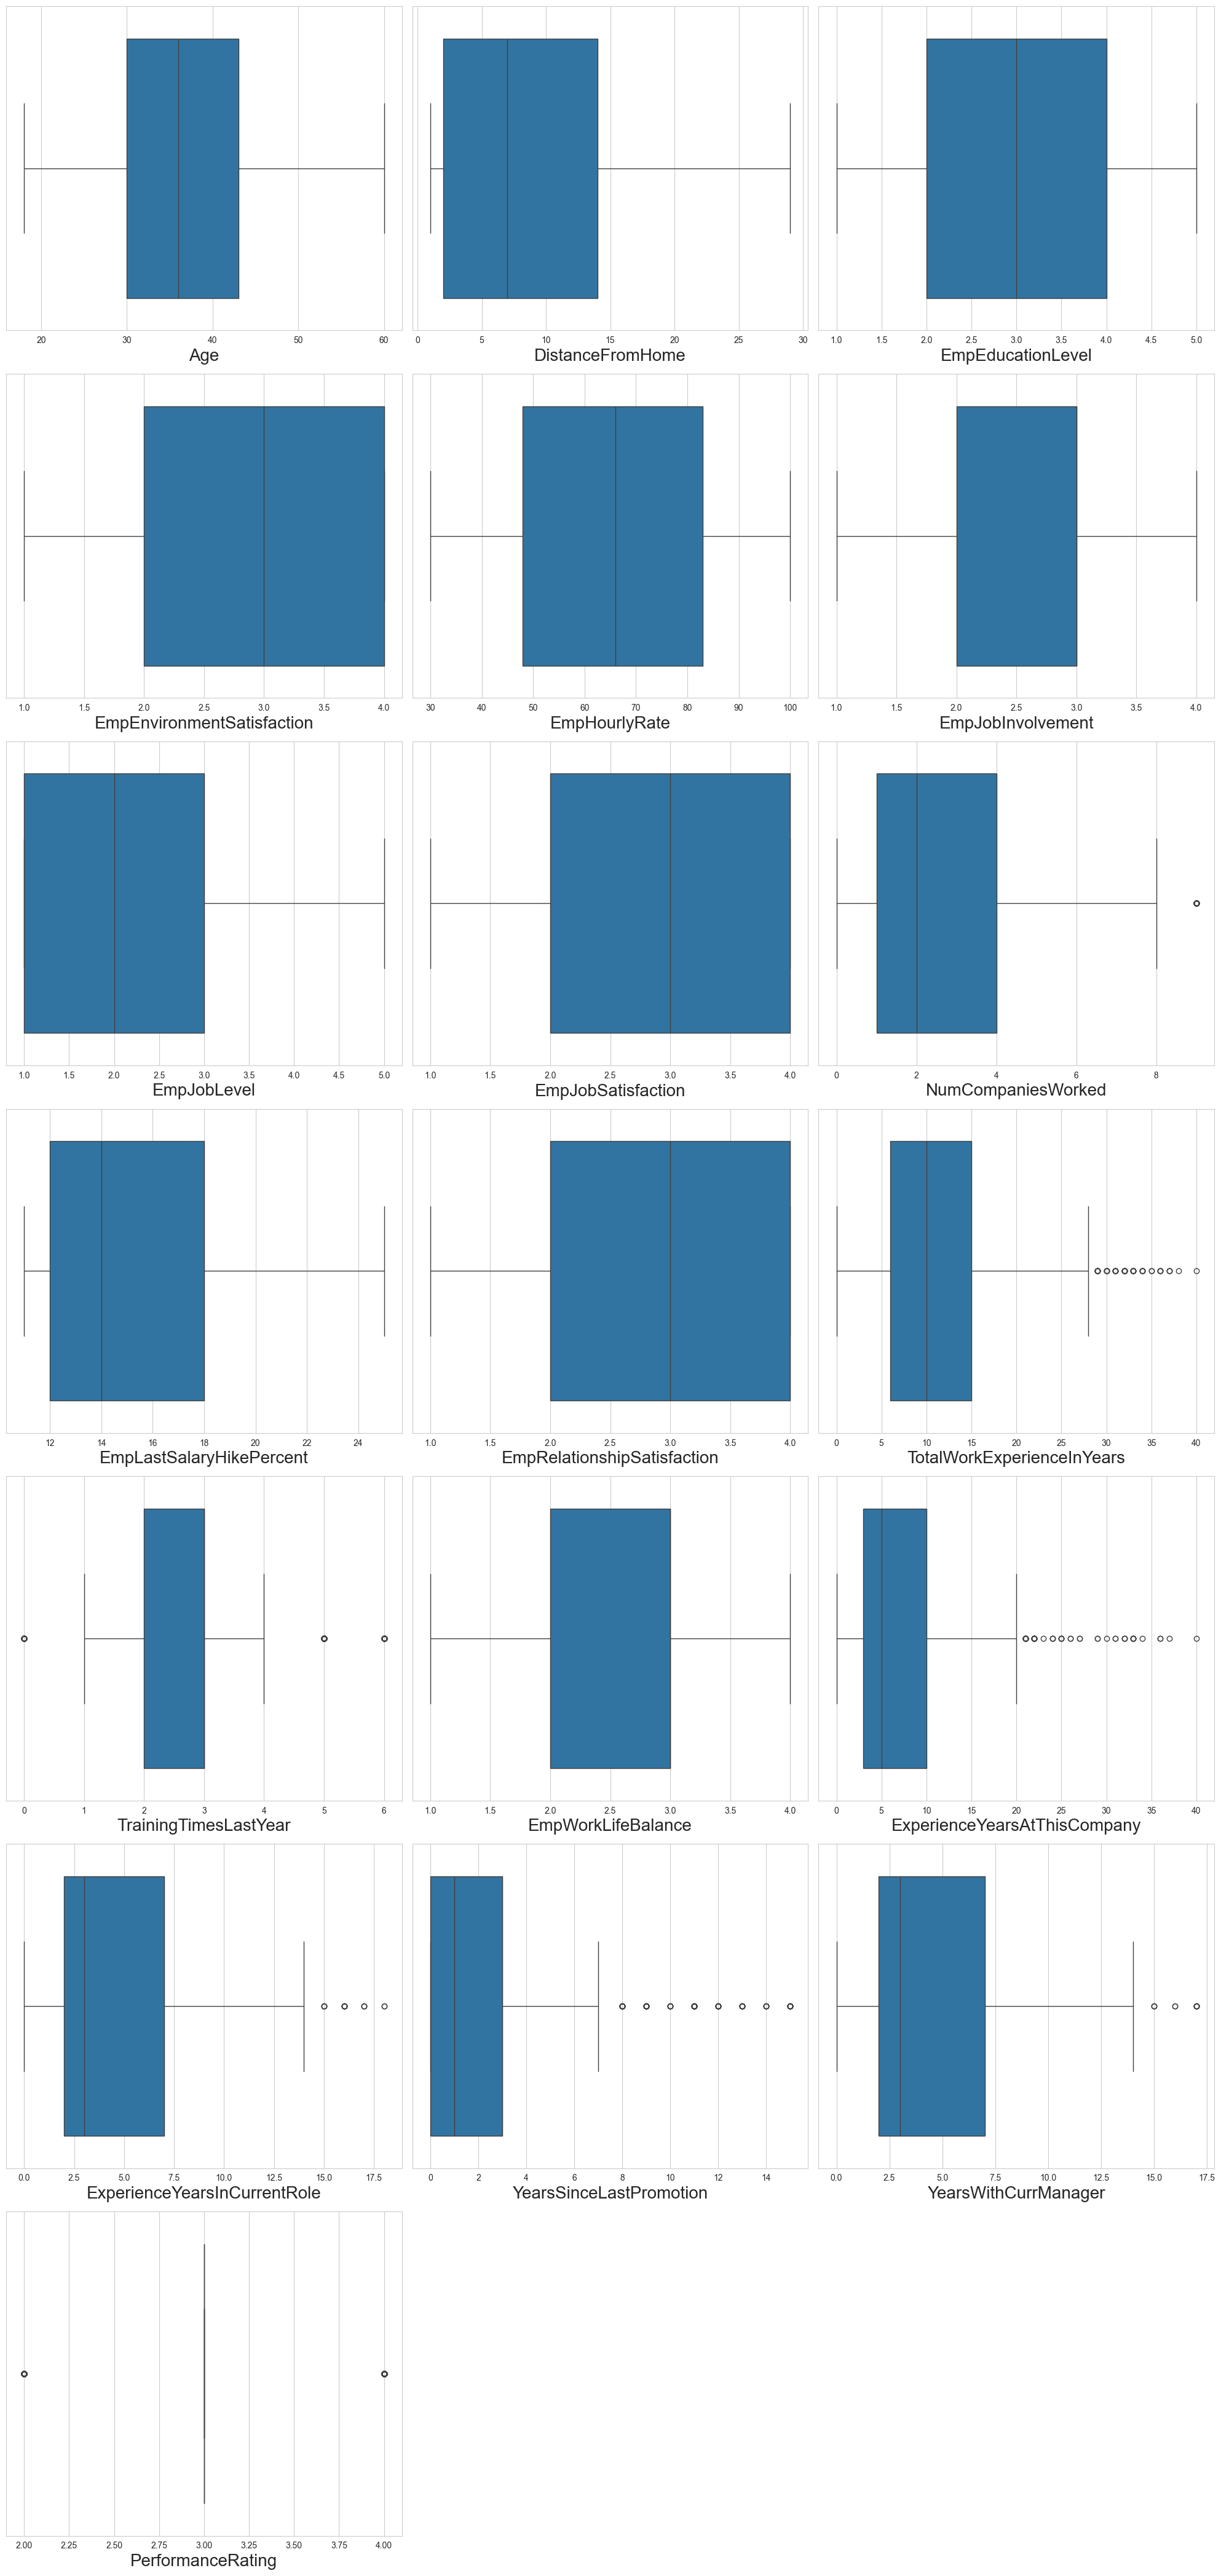

In [30]:
# Creating a viaual plot to inspect posible outliers in all the numerical columns

def plot_boxplots(data, columns):
    """
    This functiony creates and displays boxplots for specified numerical columns 
    in a DataFrame to visually inspect for outliers.
    The function directly displays the boxplot figures.
    """
    # Calculate the number of rows needed for the subplots based on the number of columns
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Adjusting to have 3 columns per row
    
    plt.figure(figsize=(20, num_rows * 6))  # Adjust the figure size dynamically based on the number of rows
    for i, column in enumerate(columns, 1):
        plt.subplot(num_rows, 3, i)  # Adjust the grid definition dynamically
        sns.boxplot(x=data[column])  # Clarifying the orientation of the boxplot
        plt.xlabel(column, fontsize=20)  # Setting the font size for better readability
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()


selected_columns = numerical_cols # assigning selected_columns to numerical_cols
plot_boxplots(df_2, selected_columns)

#### Visual inspection has revealed the presence of outliers in five columns of the dataset.
1. YearsSinceLastPromotion
2. ExperienceYearsAtThisCompany
3. TotalWorkExperienceInYears
4. YearsWithCurrManager
5. ExperienceYearsInCurrentRole

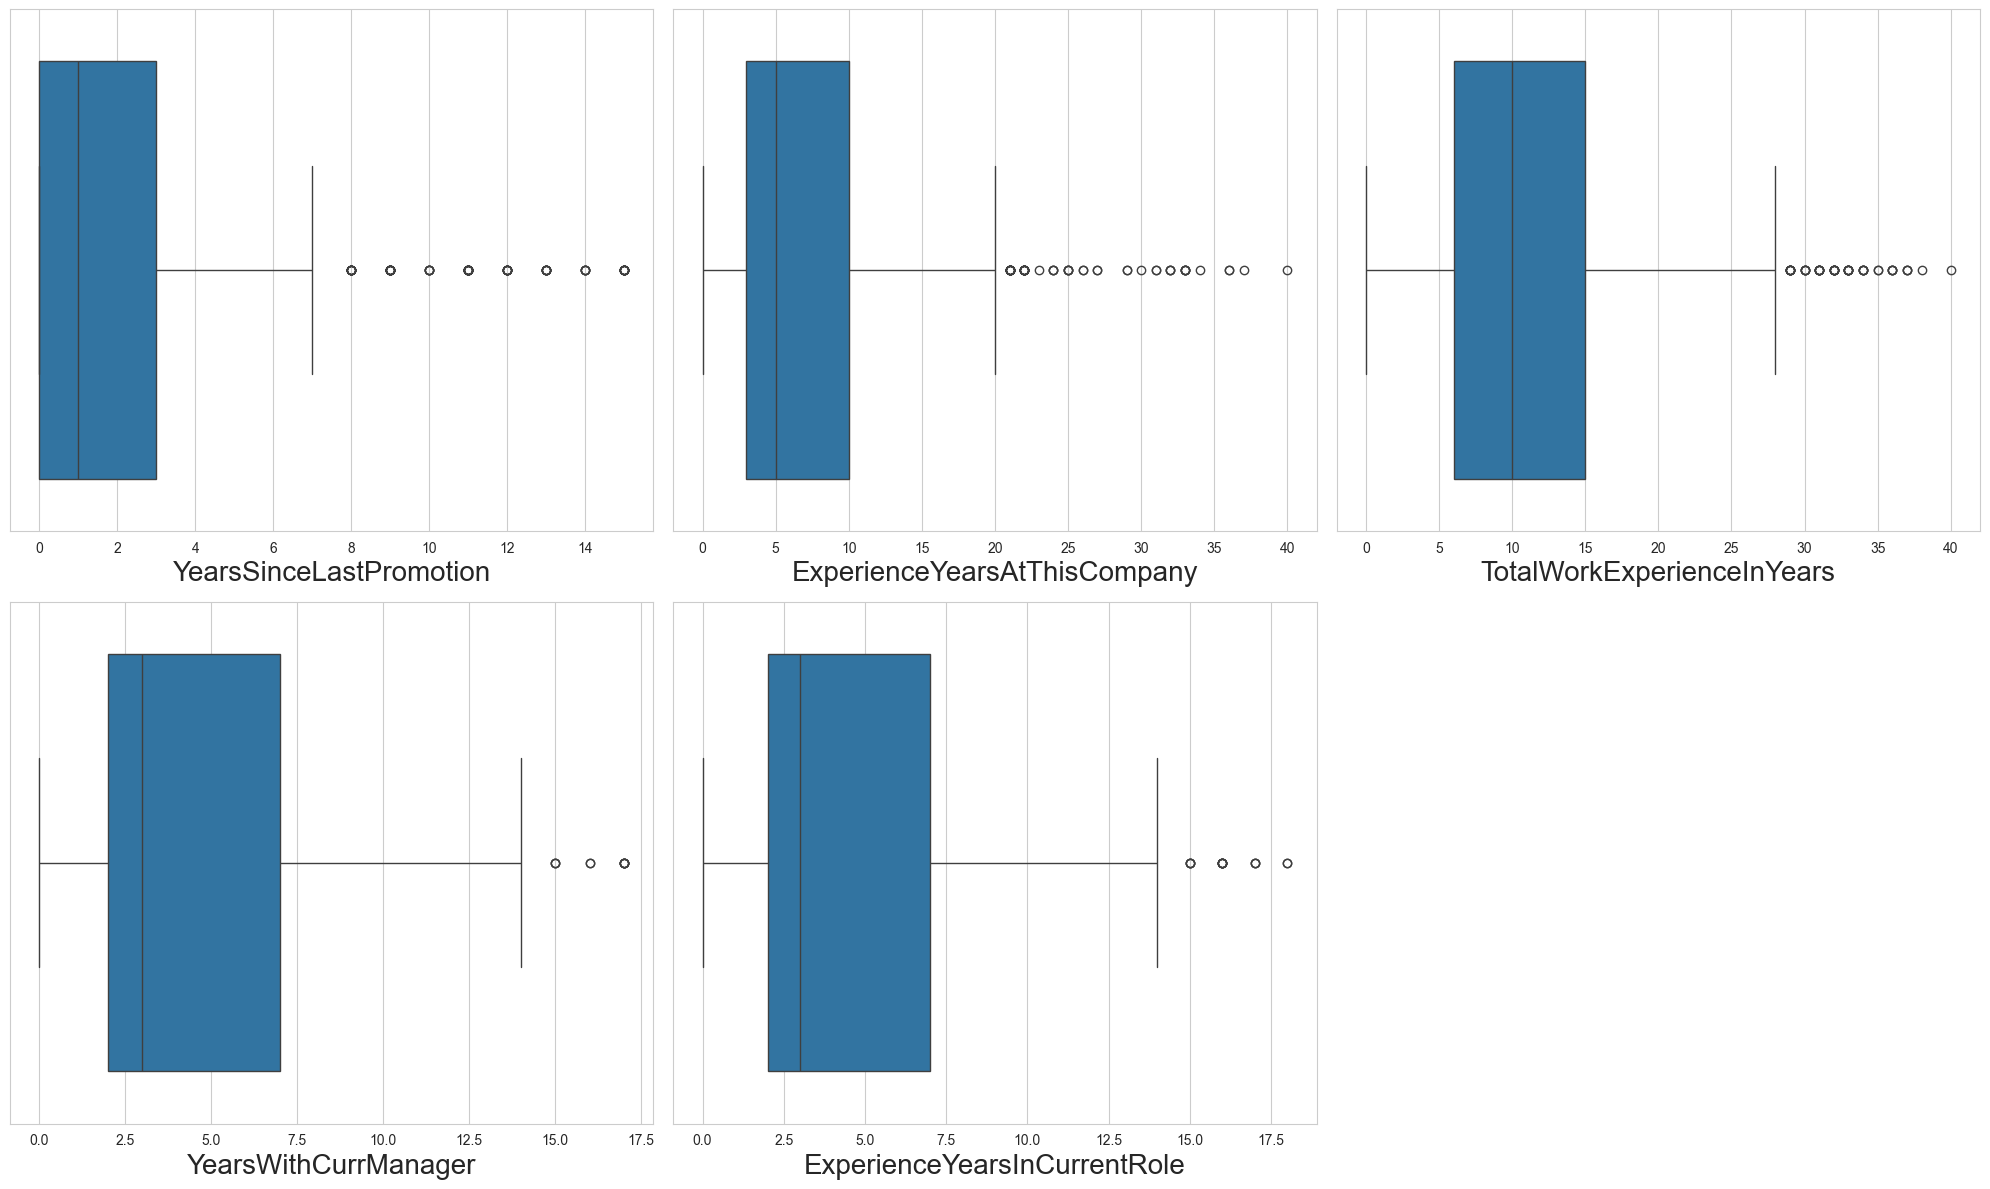

In [31]:
# visulising the list of selected colunms to be computed for outliers

# defining the list of columns with outliers 

Outlier_col_list = ['YearsSinceLastPromotion','ExperienceYearsAtThisCompany',
                    'TotalWorkExperienceInYears','YearsWithCurrManager','ExperienceYearsInCurrentRole']
# ploting the colunms using the plot_boxplots function defined above passing df_2 and Outlier_col_list
plot_boxplots(df_2, Outlier_col_list)

####  Visualizing the Data Distribution to Determine the Appropriate Method for Outlier Imputation

To effectively manage outliers, it is crucial to understand the data distribution in order to choose the appropriate method for imputation. This understanding can often be achieved through visualizations that highlight the underlying patterns and potential anomalies in the data. By examining these visual distributions, we can make informed decisions about the most suitable techniques for handling outliers..

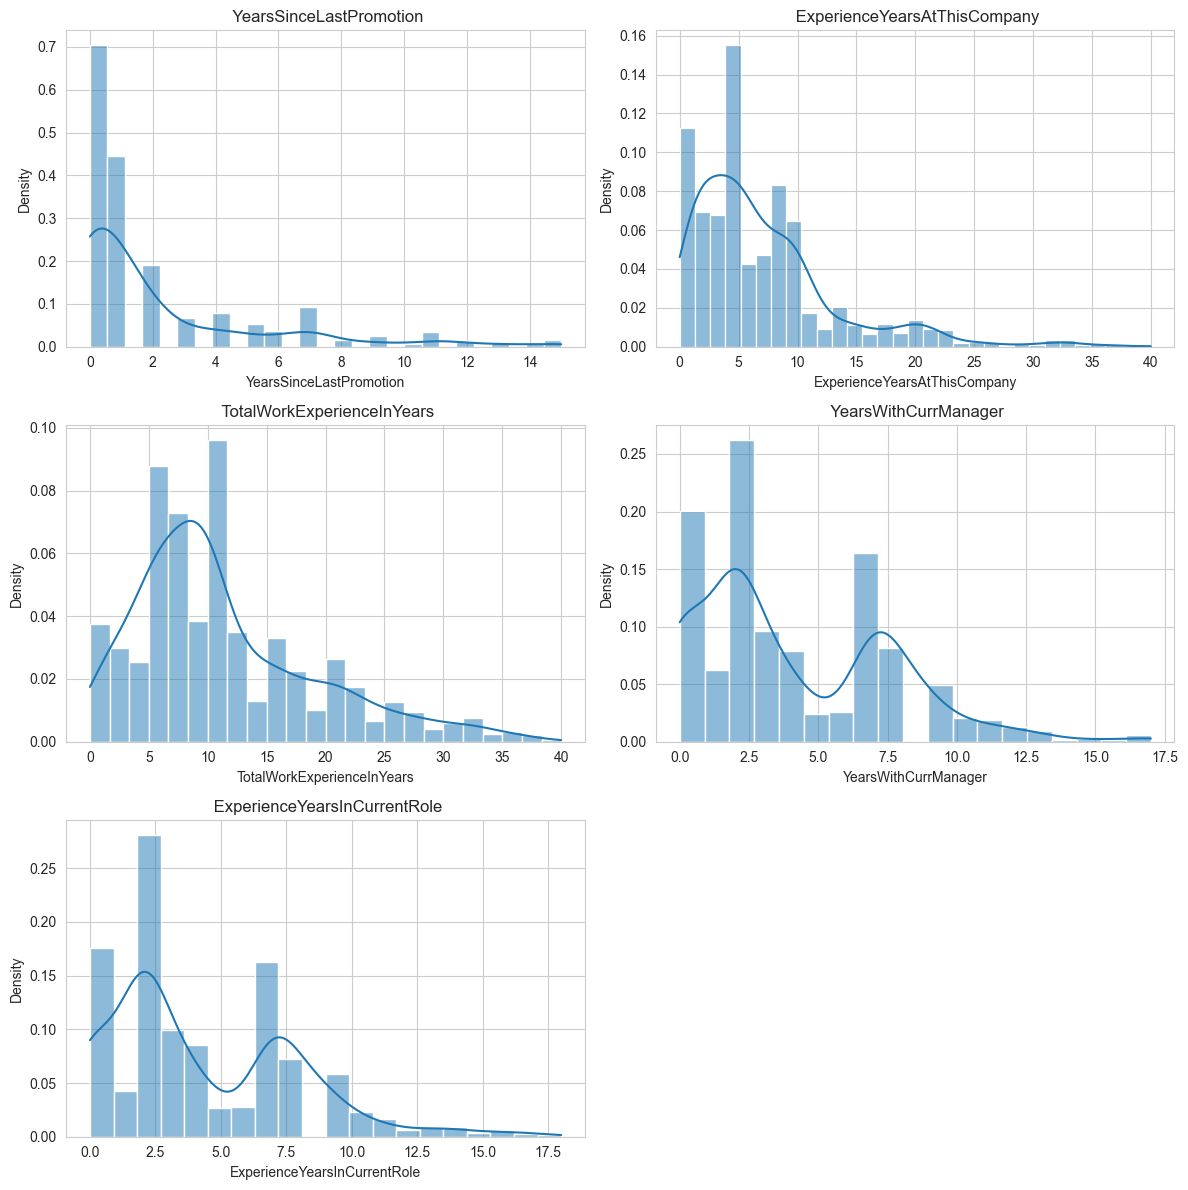

In [32]:
# visulizing the data distribution of data to determine which method to be used for outlier imputation

# Define the list of numeric features
numeric_features = Outlier_col_list
#creating a series of Kernel Density Estimate (KDE) plots for numeric features defined above "numeric_features" and organizing them into a grid layout for easy comparison

num_rows = (len(numeric_features) + 1) // 2  # Adding 1 to round up if there's an odd number of features

# Set up the figure and axes for plotting
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4*num_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Iterate over each numeric feature and plot its KDE
for i, feature in enumerate(numeric_features):
    sns.histplot(df_2[feature], ax=axes[i], kde=True, element='bars', stat='density')
    axes[i].set_title(f' {feature}')

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

From the visualizations presented, it is evident that most columns exhibit a right-skewed distribution; therefore, ***median*** imputation will be employed to address outliers."

#### Outlier Imputation using median

In [33]:
# Defining a function that takes data frame and list of colunm names with outliers 

def impute_outliers_with_median(data, columns):
    """
    This function Imputes outliers in specified columns of a DataFrame using the median value.
    The function returns a DataFrame with outliers imputed using the median value.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    data = data.copy()
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = data[column].median()

        # Apply imputation to the data values outside the IQR
        data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = median_value
    
    return data

# assigning the data frame to imputed data_frame
df_imputed = impute_outliers_with_median(df_2, Outlier_col_list)


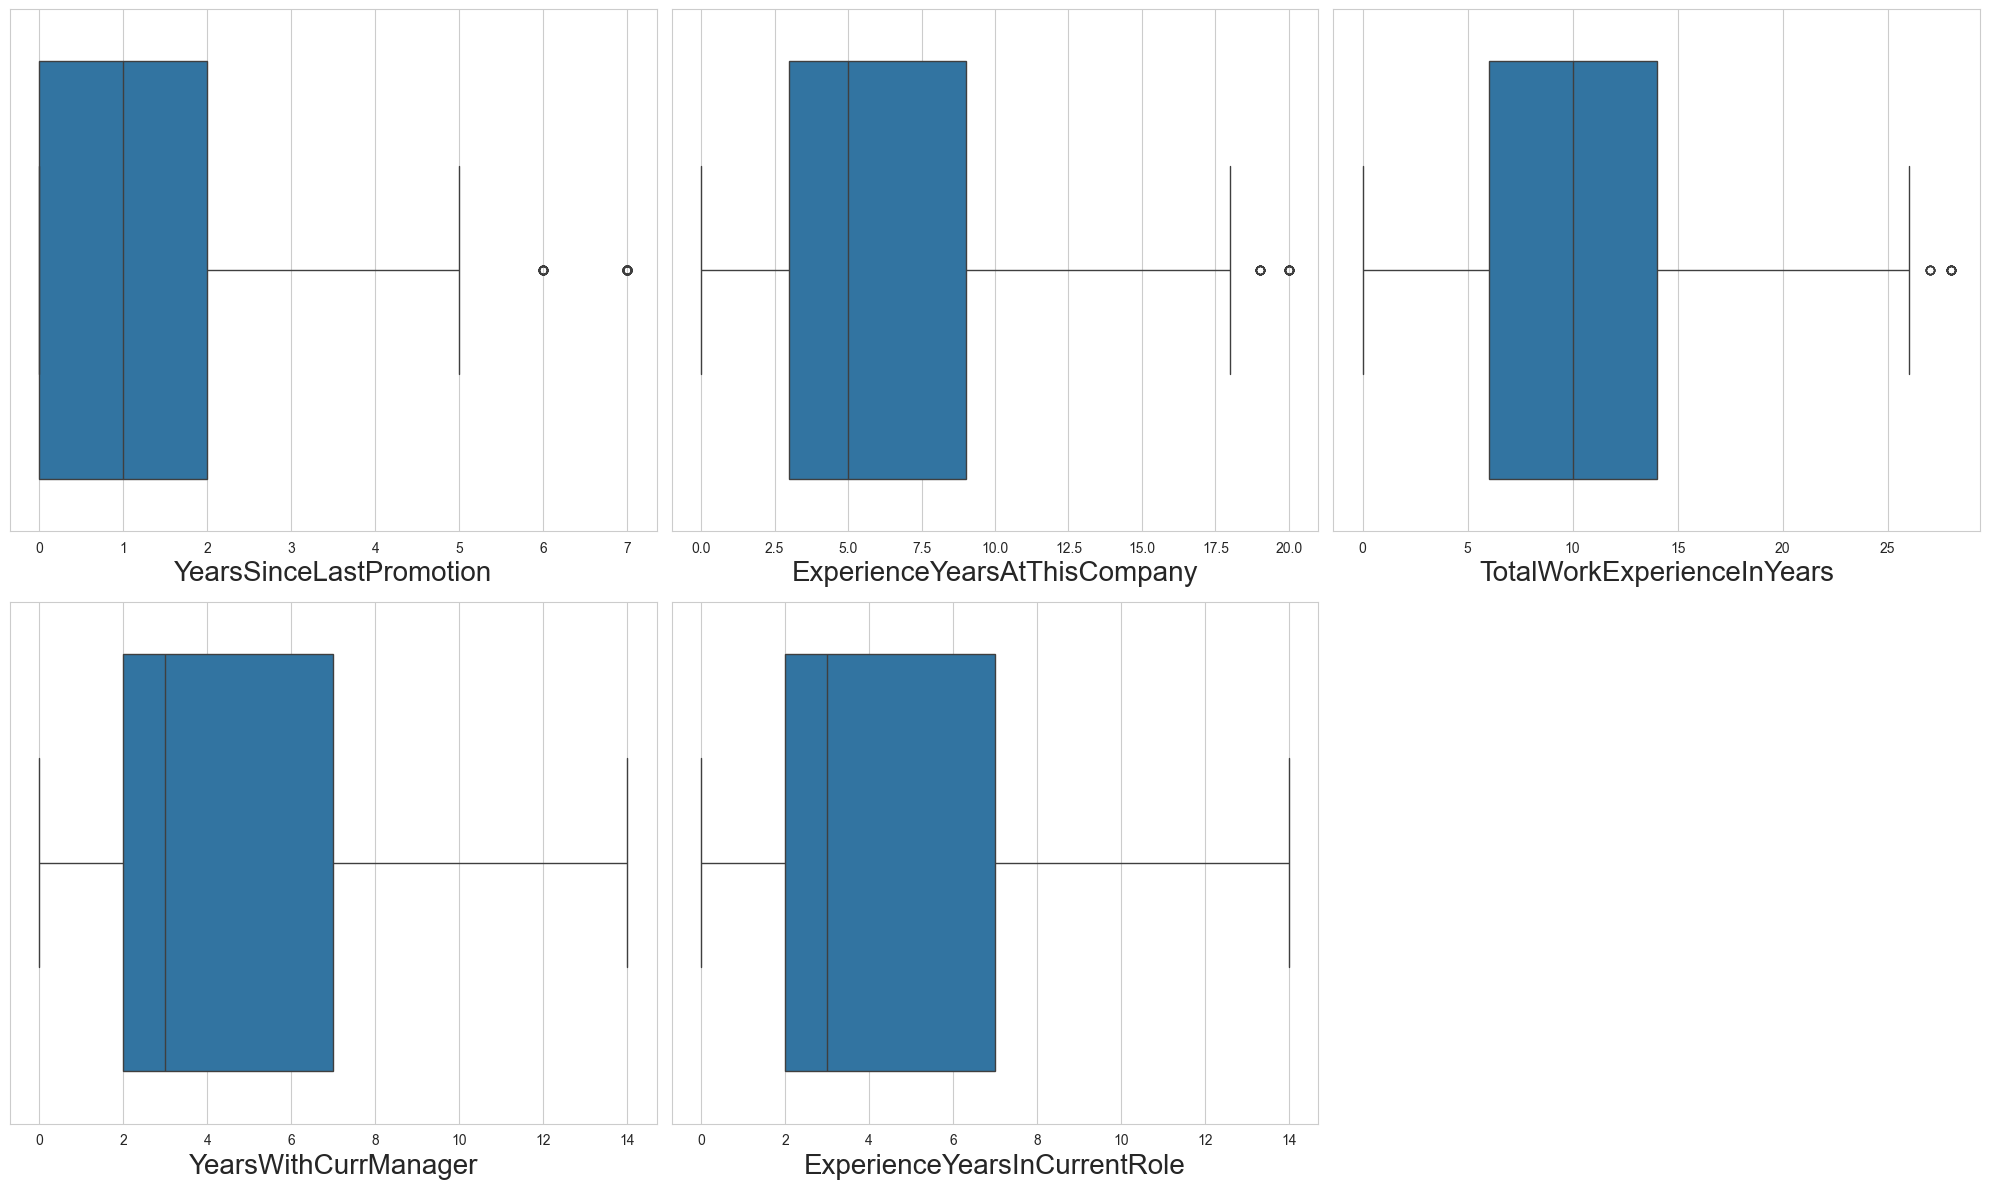

In [34]:
# Checking the changes in the imputed columns using the plot_boxplots function defined above

plot_boxplots(df_imputed, Outlier_col_list)

#### Checking for skewness and Kurtosis

In [35]:
# Calculates and summarizes the skewness and kurtosis for specified numerical columns in a data frame.

columns_of_interest = numerical_cols
# Initialize a dictionary to store skewness and kurtosis values
statistics_data = {}

for column_name in columns_of_interest:
    skew_value = df_imputed[column_name].skew()
    kurtosis_value = df_imputed[column_name].kurtosis()
    statistics_data[column_name] = {'Skewness': skew_value, 'Kurtosis': kurtosis_value}
    
'''This function takes all the numerical and uses the .skew and .kurtosis to check for skewness 
and kurtosis per feature; it returns a data frame with 
Loop through each column, calculate skewness and kurtosis, and store them'''

# Convert the dictionary to a DataFrame for better visualization
stats_df = pd.DataFrame(statistics_data).T  # Transpose to swap rows and columns for better visualization
stats_df.index.name = 'Feature'
stats_df.reset_index(inplace=True)

# Print the resulting DataFrame
stats_df

,Feature,Skewness,Kurtosis
0,Age,0.384145,-0.431000
1,DistanceFromHome,0.962956,-0.242017
2,EmpEducationLevel,-0.250974,-0.635594
3,EmpEnvironmentSatisfaction,-0.307665,-1.205577
4,EmpHourlyRate,-0.035165,-1.186891
5,EmpJobInvolvement,-0.557846,0.368670
6,EmpJobLevel,1.024053,0.386338
7,EmpJobSatisfaction,-0.324276,-1.223147
8,NumCompaniesWorked,1.048635,0.068863
9,EmpLastSalaryHikePercent,0.808654,-0.299741


### Highly Skewed Features:

***EmpJobLevel: Skewness = 1.024, Kurtosis = 0.386***
Moderately high skewness might require transformation or outlier treatment.

***YearsSinceLastPromotion: Skewness = 1.667, Kurtosis = 1.923***
High skewness and kurtosis indicate a significant number of outliers and a sharp peak. This feature is a prime candidate for data transformation to reduce right skewness and manage outliers.

***ExperienceYearsAtThisCompany: Skewness = 1.088, Kurtosis = 1.006***
Similar to "YearsSinceLastPromotion", this feature shows both high skewness and kurtosis, suggesting the need for transformations to normalize the distribution.


#### Imputing skewness and Kurtosis

In [36]:
  """
    Applies log transformation followed by Box-Cox transformation to specified columns
    in the DataFrame to normalize their distributions. Original columns are dropped 
    after transformation to prevent multicollinearity in the dataset. The function 
    modifies the DataFrame in-place and does not return a value.
    """

# Check for zeros in the dataset for log transformations
print("Zeroes in 'YearsSinceLastPromotion':", (df_imputed['YearsSinceLastPromotion'] == 0).sum())
print("Zeroes in 'ExperienceYearsAtThisCompany':", (df_imputed['ExperienceYearsAtThisCompany'] == 0).sum())

# Applying log transformation, adding 1 to avoid log(0)
df_imputed['YearsSinceLastPromotion_log'] = np.log1p(df_imputed['YearsSinceLastPromotion'])
df_imputed['ExperienceYearsAtThisCompany_log'] = np.log1p(df_imputed['ExperienceYearsAtThisCompany'])

# Check if Box-Cox transformation is needed and apply it
# Ensure all values are positive for Box-Cox transformation
if (df_imputed['YearsSinceLastPromotion_log'] <= 0).any():
    df_imputed['YearsSinceLastPromotion_log'] = boxcox(df_imputed['YearsSinceLastPromotion_log'] + 1)[0]
else:
    df_imputed['YearsSinceLastPromotion_log'] = boxcox(df_imputed['YearsSinceLastPromotion_log'])[0]

if (df_imputed['ExperienceYearsAtThisCompany_log'] <= 0).any():
    df_imputed['ExperienceYearsAtThisCompany_log'] = boxcox(df_imputed['ExperienceYearsAtThisCompany_log'] + 1)[0]
else:
    df_imputed['ExperienceYearsAtThisCompany_log'] = boxcox(df_imputed['ExperienceYearsAtThisCompany_log'])[0]

# Checking the new skewness values after transformations
print("New skewness after transformation - 'YearsSinceLastPromotion':", df_imputed['YearsSinceLastPromotion_log'].skew())
print("New skewness after transformation - 'ExperienceYearsAtThisCompany':", df_imputed['ExperienceYearsAtThisCompany_log'].skew())

# Drop the original columns to avoid introducing highly correlated features
df_imputed.drop(['YearsSinceLastPromotion', 'ExperienceYearsAtThisCompany'], axis=1, inplace=True)


Zeroes in 'YearsSinceLastPromotion': 469
Zeroes in 'ExperienceYearsAtThisCompany': 36
New skewness after transformation - 'YearsSinceLastPromotion': 0.05690721227382596
New skewness after transformation - 'ExperienceYearsAtThisCompany': -0.09750464851926502


### correlation plot with heatmap to detect and remove highly correlated features

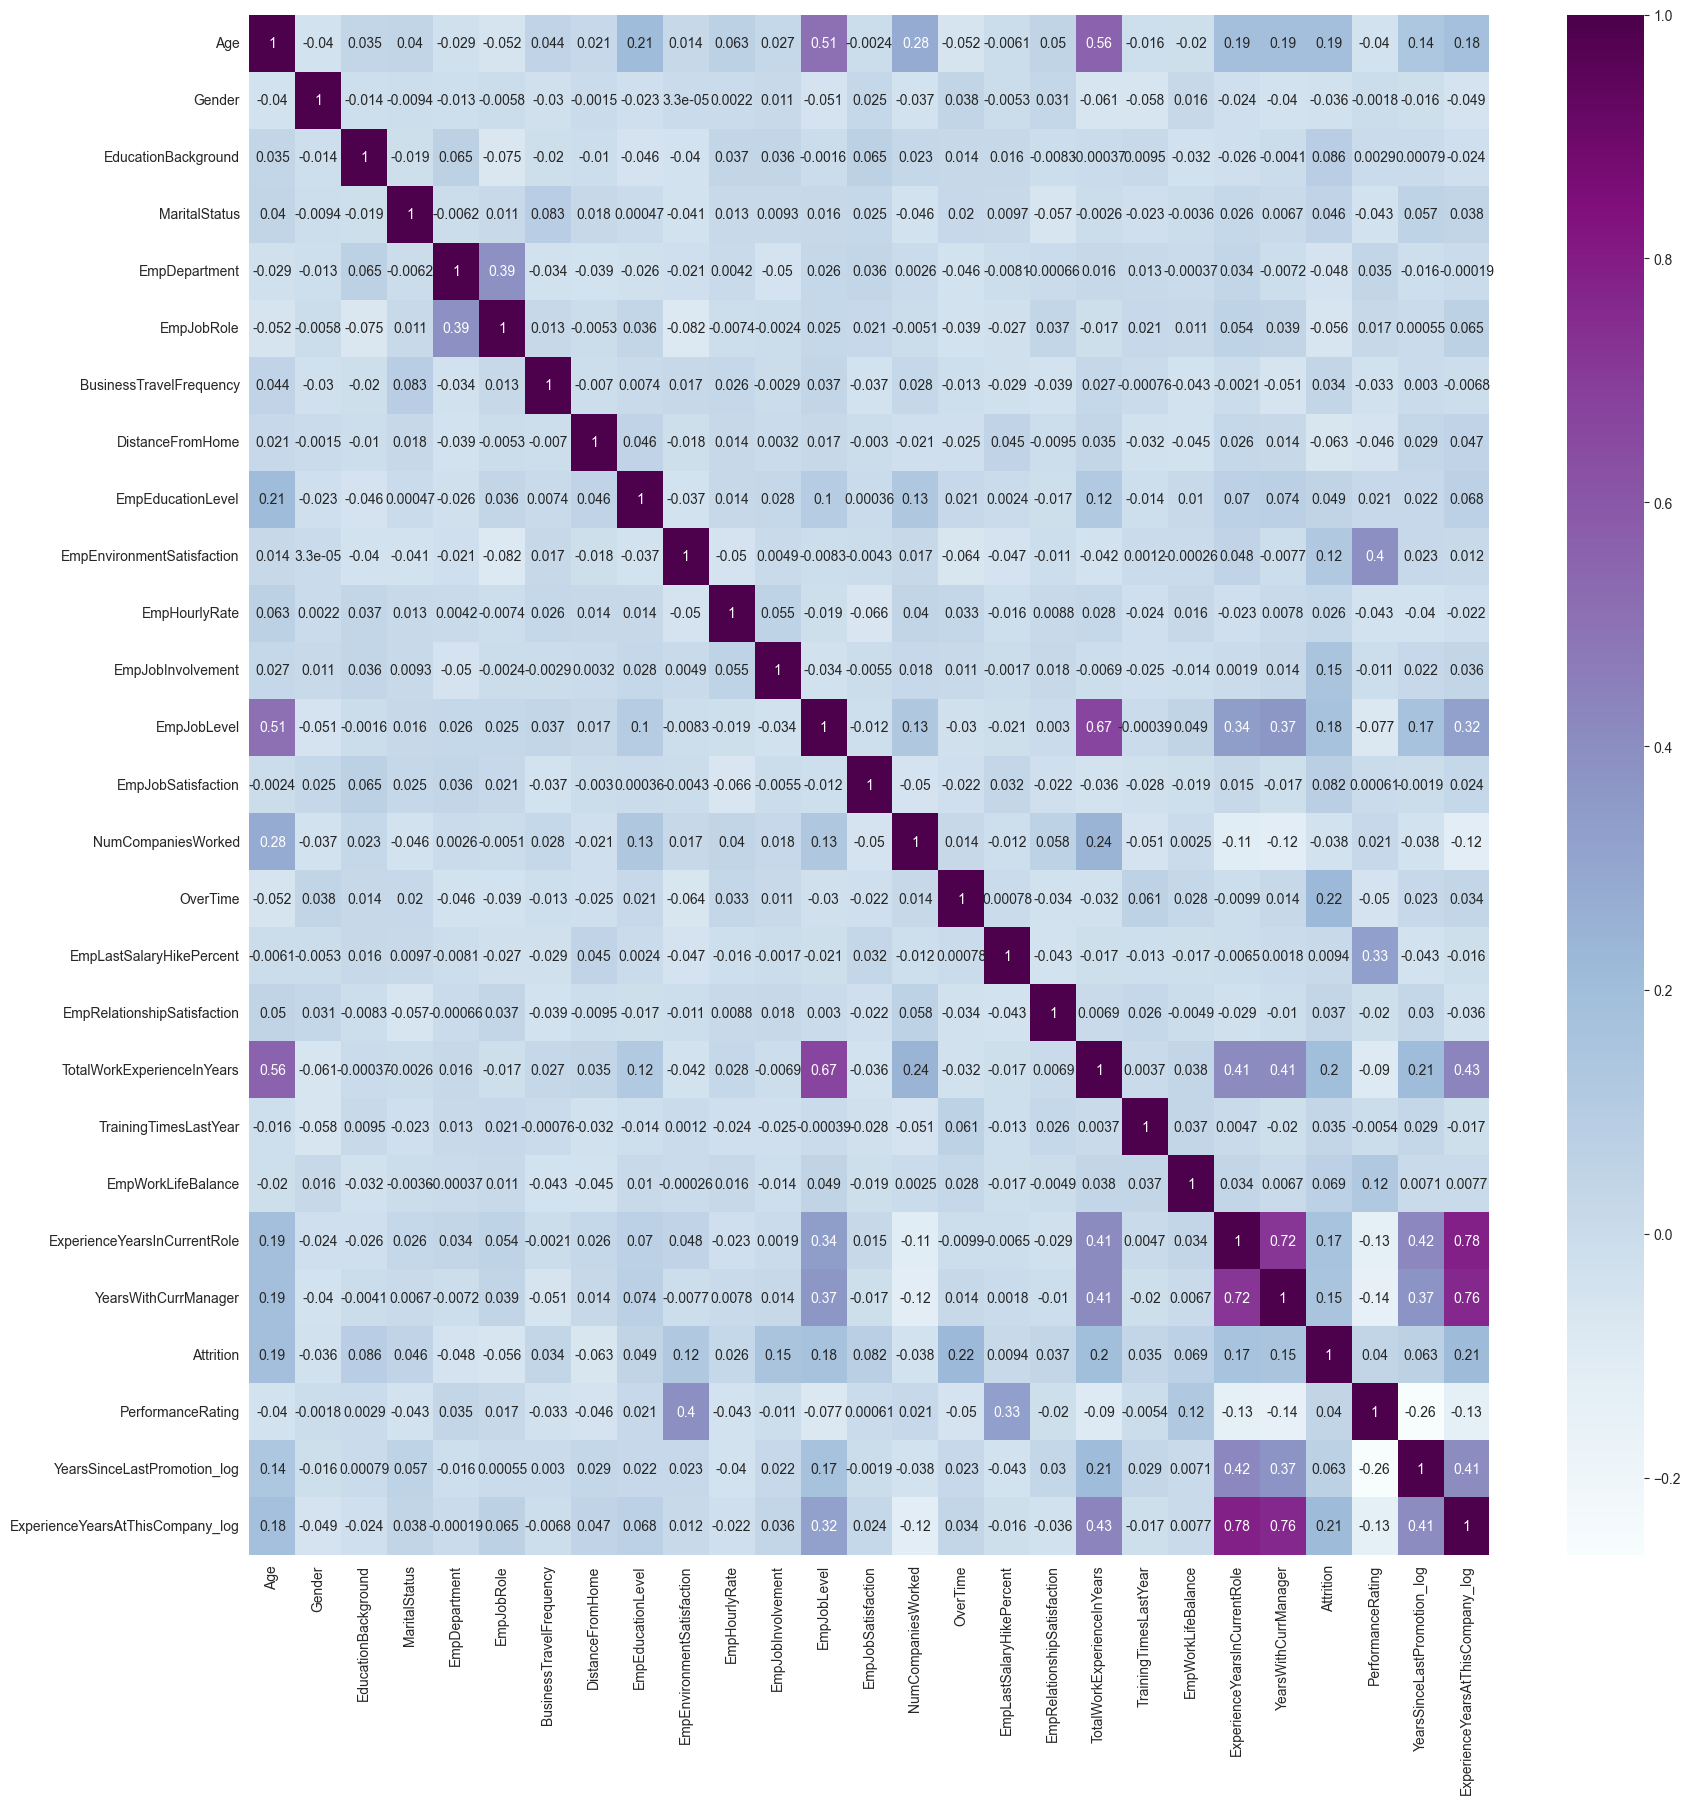

In [37]:
# ploting our data using a heatmap

plt.figure(figsize=(20,20))
sns.heatmap(df_imputed.drop('EmpNumber',axis=1).corr(),annot=True,cmap='BuPu')
plt.show()

##### No highly correlated features detected 

#### Feature selection using Lasso

In [38]:
# Feature selection for modeling 

'''The code aims to standardize features in a dataset, fit a Lasso regression model for
feature selection, and identify the most relevant features (up to 20) that contribute
to predict the 'PerformanceRating' based on their impact and significance in the 
Lasso model. This process helps in building more efficient and potentially more
accurate predictive models'''

#Spleting data 
X = df_imputed.drop('PerformanceRating', axis=1)
Y = df_imputed['PerformanceRating']

# Create the pipeline with Lasso for feature selection
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectFromModel(Lasso(alpha=0.001), max_features=10, threshold=-np.inf))
])

# Fit the pipeline on the data
pipeline.fit(X, Y)

# Transform X using the pipeline to get a filtered dataset with selected features only
X_selected = pipeline.transform(X)

# Extract the names of selected features
selected_features = X.columns[pipeline.named_steps['feature_selection'].get_support()]
print("Selected features:", selected_features)

# Create a data frame with the selected features for further analysis, e.g., PCA
X_filtered = pd.DataFrame(X_selected, columns=selected_features)
X_filtered.head()  # Show the first few rows of the filtered DataFrame

Selected features: Index(['EmpJobRole', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsWithCurrManager',
       'YearsSinceLastPromotion_log'],
      dtype='object')


,EmpJobRole,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpLastSalaryHikePercent,EmpWorkLifeBalance,ExperienceYearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion_log
0,1.303097,0.102061,0.103000,1.177978,-0.543569,-0.889111,-1.064491,0.864098,1.202103,-1.145454
1,1.303097,0.591464,1.061145,1.177978,-1.187042,-0.889111,0.365956,0.864098,0.902825,0.304344
2,1.303097,-0.509693,1.061145,1.177978,-0.890055,1.594054,0.365956,2.661702,2.399219,0.304344
3,-0.878222,0.102061,1.061145,-0.656641,0.347393,-0.061389,-1.064491,0.564498,0.603546,0.304344
4,1.303097,0.836165,1.061145,-1.573950,0.891870,-0.337297,0.365956,-0.633905,-0.593570,0.828877


In [39]:
X_filtered.keys()


Index(['EmpJobRole', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate',
       'EmpLastSalaryHikePercent', 'EmpWorkLifeBalance',
       'ExperienceYearsInCurrentRole', 'YearsWithCurrManager',
       'YearsSinceLastPromotion_log'],
      dtype='object')

## 4. Model Building, traning and prediction

In [40]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
'''Balancing the data in the target variable so that it has an equal distribution
Applying RandomOver_Sampler on our data to ensure that the target variables are evenly 
distributed thereby providing equal chances for each target class'''

RandomOver_Sampler = RandomOverSampler(random_state=42)
X_sampled,Y_sampled = RandomOver_Sampler.fit_resample(X_filtered, Y)

In [42]:
# Confirming the change in the distribution of classes in the target column after applying to the sample 

Y_sampled.value_counts()

PerformanceRating
3    874
4    874
2    874
Name: count, dtype: int64

In [43]:
# saving the pre_processed data

X_sampled.to_csv('processed_data.csv', index=False)
print("processed_data saved successfully.")

processed_data saved successfully.


In [44]:
Y_sampled

0       3
1       3
2       4
3       3
4       3
       ..
2617    4
2618    4
2619    4
2620    4
2621    4
Name: PerformanceRating, Length: 2622, dtype: int64

In [45]:
# Spliting our data into train tests to fit our model
X_new = X_sampled
Y_new = Y_sampled

X_train, X_test, Y_train, Y_test = train_test_split(X_new,Y_new,test_size=0.2, random_state=42)

### Model selection 

###### Models to be used
1. KNeighborsClassifier()
2. RandomForestClassifier()
3. SVC()

In [46]:
'''Standardizing data ensures that each feature contributes equally to the analysis and improves 
the performance of machine learning algorithms by transforming features to have zero mean and 
unit variance, which facilitates faster convergence and more accurate model outcomes.'''

# Initialize the StandardScaler for normalizing feature scales
scaler_model = StandardScaler()

# Fit the scaler to the training data and transform it, ensuring all features contribute equally
X_train = scaler_model.fit_transform(X_train)

# Apply the same scaler to the test data for consistency
X_test = scaler_model.transform(X_test)

# Save the scaler model to a file for future use with the same data transformations
dump(scaler_model, 'scaler_model.joblib')
print("scaler_model saved successfully.")

scaler_model saved successfully.


In [47]:
# Creating a list of models to be used in our model training function 

models = [KNeighborsClassifier(),RandomForestClassifier(),SVC()]

In [48]:
def compare_models_cross_validation(models, X_train, Y_train, X_test, Y_test):
    for model in models:
        # Perform cross-validation
        cross_validation_scores = cross_val_score(model, X_train, Y_train, cv=5)
        mean_cross_validation_score = round(cross_validation_scores.mean(), 3)
        
        # Train the model
        model.fit(X_train, Y_train)
        
        # Predict on training and testing data
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        # Calculate training and testing accuracies
        train_accuracy = round(accuracy_score(Y_train, train_pred), 3)
        test_accuracy = round(accuracy_score(Y_test, test_pred), 3)
        
        # Generate classification report for testing data
        report = classification_report(Y_test, test_pred)
        
        # Print results
        print("Model:", type(model).__name__)
        print("Mean Cross Validation Accuracy Score:", mean_cross_validation_score)
        print("Training Accuracy:", train_accuracy)
        print("Testing Accuracy:", test_accuracy)
        print("Classification Report:")
        print(report)
        print("="*50)
compare_models_cross_validation(models, X_train, Y_train, X_test, Y_test)

Model: KNeighborsClassifier
Mean Cross Validation Accuracy Score: 0.876
Training Accuracy: 0.922
Testing Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           2       0.86      0.86      0.86       184
           3       0.85      0.67      0.75       173
           4       0.81      0.99      0.89       168

    accuracy                           0.84       525
   macro avg       0.84      0.84      0.84       525
weighted avg       0.84      0.84      0.84       525

Model: RandomForestClassifier
Mean Cross Validation Accuracy Score: 0.972
Training Accuracy: 1.0
Testing Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           2       0.94      1.00      0.97       184
           3       1.00      0.92      0.96       173
           4       0.99      1.00      0.99       168

    accuracy                           0.98       525
   macro avg       0.98      0.97      0.98       525
weight

### Hyperparameter tunning 

In [49]:

'''The script conducts parameter optimization for various machine learning models using GridSearchCV to identify the most effective
parameters based on accuracy. Results are collected and presented in a DataFrame for straightforward comparison and analysis.'''

# Define a list of tuples containing model names, model instances, and dictionaries of hyperparameters for grid search
models = [
    ('KNN', KNeighborsClassifier(), {'n_neighbors': [3, 5, 10]}),
    ('RandomForest', RandomForestClassifier(), {'n_estimators': [10, 20, 50, 100]}),
    ('SVC', SVC(), {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]})
]

# Initialize an empty list to store the results of the Grid Search for each model
results = []

# Iterate through each model and its associated parameters
for name, model, params in models:
    # Initialize GridSearchCV with the model and its parameters, specifying the number of folds and the scoring metric
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    # Fit GridSearchCV to the training data
    grid_search.fit(X_train, Y_train)
    
    # Extract the highest cross-validated score and the corresponding best parameters from the grid search
    best_score = grid_search.best_score_
    best_params = grid_search.best_params_
    
    # Store the model name, best score, and best parameters in the results list
    results.append({'Model': name, 'Best_Score': best_score, 'Best_Params': best_params})

# Convert the list of results into a pandas DataFrame for better visualization and analysis
results_df = pd.DataFrame(results)

# Output the results DataFrame showing the best model performance and parameters found
print(results_df)

          Model  Best_Score                 Best_Params
0           KNN    0.898893          {'n_neighbors': 3}
1  RandomForest    0.973773        {'n_estimators': 50}
2           SVC    0.941830  {'C': 20, 'kernel': 'rbf'}


### RandomForest model was selected for training 

Based on the results displayed in the DataFrame, the RandomForest model achieved the highest accuracy with a score of 0.974253 using 100 estimators, making it the most effective among the tested models for this dataset. Although the SVC model also shows strong performance with a 0.941830 accuracy using C=20 and the 'rbf' kernel, the RandomForest model stands out as the preferred choice due to its superior accuracy and effective handling of the features in the dataset.

### Training our selected model RandomForestClassifier

In [50]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

#rf_model = SVC()

# converting our data to the array

X_train=np.asarray(X_train)
#Y_train=np.asarray(X_train_scaled)
# Train the model on the scaled training data
rf_model.fit(X_train, Y_train)

# Make predictions on the training data and the test data
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)

# Calculate the accuracy on the training data and the test data
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Display the training and testing accuracy
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")

# Generate and display the classification report for the test data
print("Classification Report:")
print(classification_report(Y_test, Y_test_pred))

print(":"*50)
dump(rf_model, 'rf_model.joblib')
print("rf_model saved successfully.")

Training Accuracy: 1.000
Testing Accuracy: 0.977
Classification Report:
              precision    recall  f1-score   support

           2       0.94      1.00      0.97       184
           3       1.00      0.93      0.96       173
           4       0.99      1.00      1.00       168

    accuracy                           0.98       525
   macro avg       0.98      0.98      0.98       525
weighted avg       0.98      0.98      0.98       525

::::::::::::::::::::::::::::::::::::::::::::::::::
rf_model saved successfully.


In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

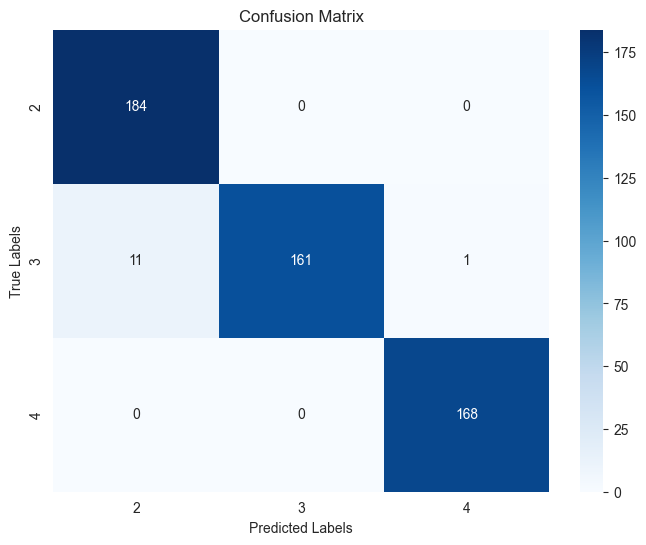

In [52]:
cm = confusion_matrix(Y_test, Y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(Y_train), yticklabels=np.unique(Y_train))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## 5. Results and Analysis

In [53]:
X_new_2.sample(2)

NameError: name 'X_new_2' is not defined

In [ ]:
rf_model.predict(X_new.sample(1))

In [ ]:
# predicting system

import streamlit as st
import pandas as pd
import joblib

# Load models and mappings
mappings = joblib.load(r"C:\Users\Muku\OneDrive\Desktop\Data Science\IABAC Exams\IABAC_Projetc_Exam\frequency_mappings.joblib")
scaler = joblib.load(r"C:\Users\Muku\OneDrive\Desktop\Data Science\IABAC Exams\IABAC_Projetc_Exam\scaler_model.joblib")
model = joblib.load(r"C:\Users\Muku\OneDrive\Desktop\Data Science\IABAC Exams\IABAC_Projetc_Exam\rf_model.joblib")

#
emp_job_role= input('Employ role')
distance_from_home = int(input('Distance From Home'))
emp_education_level = int(input('Employee Education Level'))
emp_environment_satisfaction = int(input('Employee Environment Satisfaction'))
emp_hourly_rate = int(input('Employee Hourly Rate'))
emp_last_salary_hike_percent = int(input('Employee Last Salary Hike Percent'))
emp_work_life_balance = int(input('Employee Work Life Balance'))
experience_years_in_current_role = int(input('Experience Years in Current Role'))
years_with_curr_manager = int(input('Years with Current Manager'))
years_since_last_promotion_log = int(input('Years Since Last Promotion (Log)'))


new_data = pd.DataFrame({
        'EmpJobRole': [emp_job_role],
        'DistanceFromHome': [distance_from_home],
        'EmpEducationLevel': [emp_education_level],
        'EmpEnvironmentSatisfaction': [emp_environment_satisfaction],
        'EmpHourlyRate': [emp_hourly_rate],
        'EmpLastSalaryHikePercent': [emp_last_salary_hike_percent],
        'EmpWorkLifeBalance': [emp_work_life_balance],
        'ExperienceYearsInCurrentRole': [experience_years_in_current_role],
        'YearsWithCurrManager': [years_with_curr_manager],
        'YearsSinceLastPromotion_log': [years_since_last_promotion_log]
    })
new_data


In [ ]:
# Encode categorical columns using the loaded frequency mappings
for column, mapping in mappings.items():
    if column in new_data.columns:
        new_data[column] = new_data[column].map(mapping).fillna(0)
    else:
        pass

In [ ]:
new_data

In [ ]:
# Encode categorical columns using the loaded frequency mappings
for column, mapping in mappings.items():
    if column in new_data.columns:
        new_data[column] = new_data[column].map(mapping).fillna(0)
    else:
        pass

# Standardize data
new_data_scaled = scaler.transform(new_data)
new_data_scaled
# Make prediction
prediction = model.predict(new_data_scaled)
print(f'PerformanceRating for this employee is: {prediction[0]}')


In [ ]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled
# Make prediction


In [ ]:
xp = np.asarray([ 0.22624275,  4.91238686,  3.93583652,  4.13663525, 47.26712072,
        17.42372426,  2.89465959, 12.82481305, 11.54331933,  0.89728975])

In [ ]:
print(X_new.sample(1))
prediction = model.predict(X_new.sample(1))
print(f'PerformanceRating for this employee is: {prediction[0]}')

In [ ]:
X_new.sample(1)

In [ ]:
pip freeze > requirements.txt